<a href="https://colab.research.google.com/github/shagun-srivastav/OPIM-5641-Business-Decision-Modeling/blob/main/Portfolio_Allocation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Allocation - Team 5

# Import Libs

In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.6 MB/s eta 0:00:00
Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 104MB/s]
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.8 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=0eebc703eb3d07a5d922687bfe12ae2cac6bf39cfe3ae87ee80f5d13f4

# 1 - Data Preparation and EDA


Consumer discretionary - Amazon (AMZN), Nike(NKE), Starbucks(SBUX)

Industrial - FedEx Corporation(FDX), The Boeing Company(BA), United Parcel Service(UPS)

Technology - Apple Inc(AAPL), Microsoft Corporation(MSFT), QUALCOMM Incorporated(QCOM)

In [ ]:
# Assign the ticker list that we want to
tickers_list = ['AMZN','NKE','SBUX','FDX','BA','UPS','AAPL','MSFT','QCOM']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='01/01/2022',interval='1d') for ticker in tickers_list}    #Need to include 12/31/2021 as well

In [ ]:
#display
dow_prices

{'AMZN':                   open        high         low       close    adjclose  \
 2017-01-03   37.896000   37.938000   37.384998   37.683498   37.683498   
 2017-01-04   37.919498   37.984001   37.709999   37.859001   37.859001   
 2017-01-05   38.077499   39.119999   38.013000   39.022499   39.022499   
 2017-01-06   39.118000   39.972000   38.924000   39.799500   39.799500   
 2017-01-09   39.900002   40.088501   39.588501   39.846001   39.846001   
 ...                ...         ...         ...         ...         ...   
 2021-12-27  171.037003  172.942993  169.215500  169.669495  169.669495   
 2021-12-28  170.182495  172.175995  169.135498  170.660995  170.660995   
 2021-12-29  170.839996  171.212006  168.600494  169.201004  169.201004   
 2021-12-30  169.699997  170.888000  168.524002  168.644501  168.644501   
 2021-12-31  168.955994  169.350006  166.558502  166.716995  166.716995   
 
                volume ticker  
 2017-01-03   70422000   AMZN  
 2017-01-04   50210000   A

## 1.1 Data Retrieval and Cleaning

In [ ]:
# extract just the data we need (adjclose)
# get the adjclose price for the NFLX (one sample)
prep_data = pd.DataFrame(dow_prices['AMZN']['adjclose']).rename(columns = {"adjclose":"AMZN"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

# drop the na records
prep_data.dropna(inplace=True)

In [ ]:
# Number of rows and columns
prep_data.shape

(1259, 9)

In [ ]:
# drop the na records
# prep_data.dropna(inplace=True)
for i in tickers_list:
  prep_data[i] = prep_data[i].pct_change()
# drop the na records
prep_data.dropna(inplace=True)

In [ ]:
prep_data.shape

(1258, 9)

In [ ]:
# create dataframes for the sectors
con_df = prep_data[['AMZN','NKE','SBUX']].copy()

ind_df = prep_data[['FDX','BA','UPS']].copy()

tech_df = prep_data[['AAPL','MSFT','QCOM']].copy()

## 1.2 Time Series Visualizations






### 1.2.1 Visualization of Consumer Discretionary Sector

<Axes: >

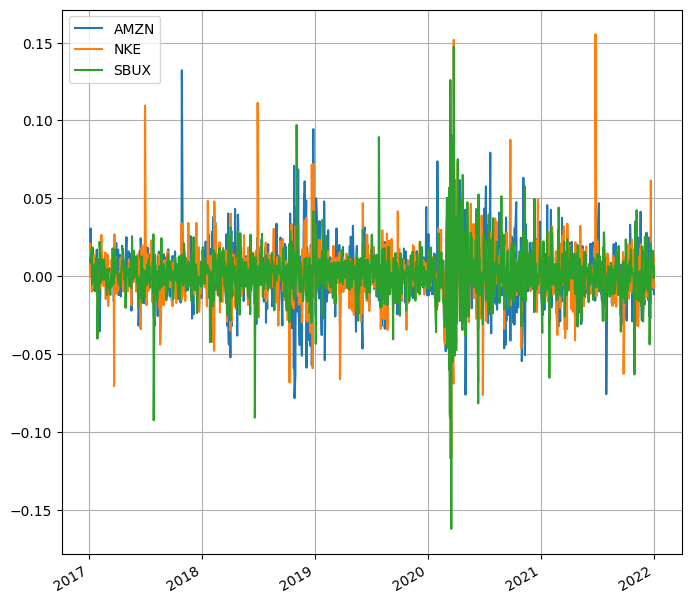

In [ ]:
con_df.plot(grid=True,
        layout=(3,4),
         figsize=(8,8))

### 1.2.2 Visualization of Industrials Sector

<Axes: >

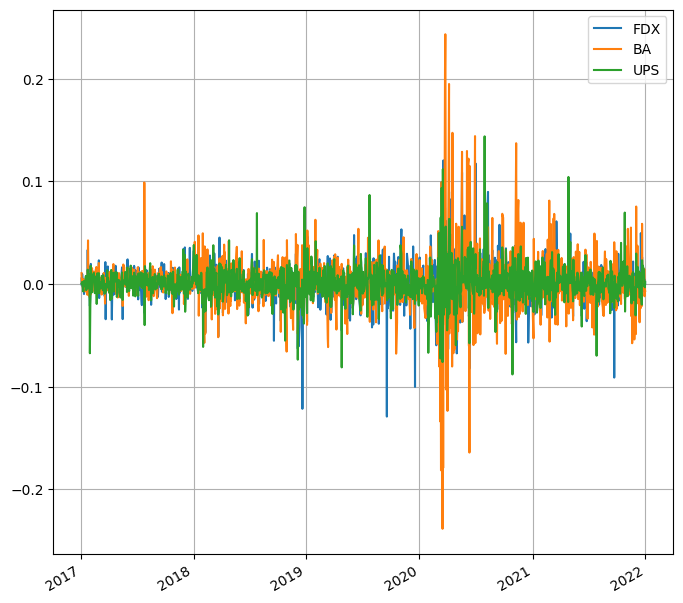

In [ ]:
ind_df.plot(grid=True,
        layout=(3,4),
         figsize=(8,8))


### 1.2.3 Visualization of Technology Sector

<Axes: >

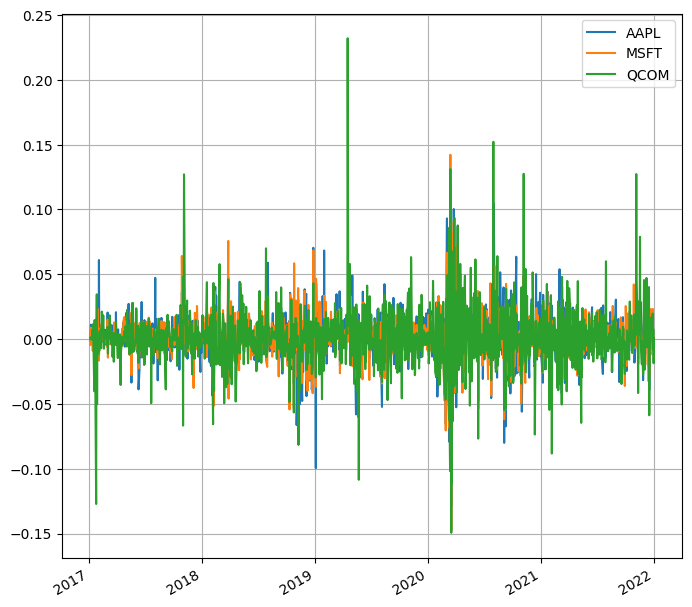

In [ ]:
tech_df.plot(grid=True,
        layout=(3,4),
         figsize=(8,8))

### Visualisation of all 9


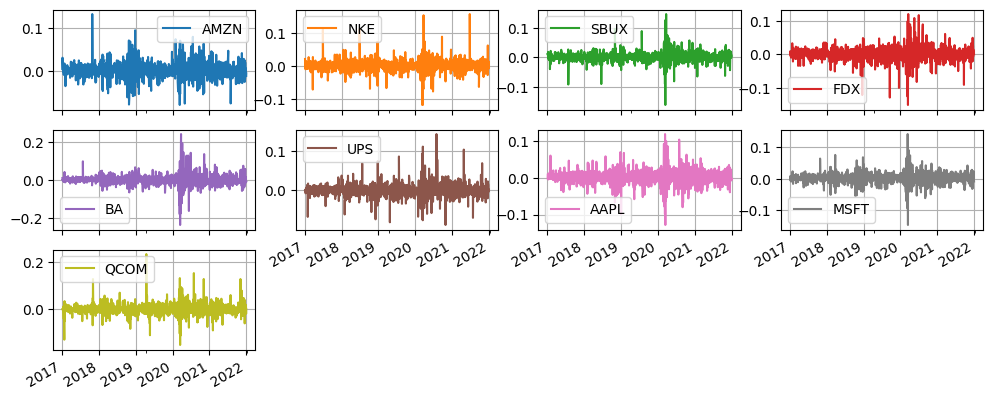

In [ ]:
# plot the trend by month
prep_data.plot(subplots=True,
        grid=True,
        layout=(3,4),
        figsize=(12,5))
plt.show()

## 1.3 - Discussion of the Plots

**Consumer Discretionary sector:** Amazon was highly volatile, with high gains and big drops over the years, while Nike and Starbucks looked to be safer bets. Nike looks like a good stock because it has multiple highs throughout the period, and its drops are relatively small. Starbucks looks the least volatile, however, the upward gains are not as much as the other two.

**Industrials Sector:** The stock price of Boeing was unsurprisingly stable pre-pandemic, as the travel and aerospace industry never looked under any threat. However, it had the highest volatility once travel restrictions hit. UPS and Fedex performed similarly for the most part, but UPS was much more volatile.

**Technology Sector:** Microsoft looks to be the most stable stock in the technology sector over the period, while Qualcomm the most volatile. Interestingly however, Qualcomm, which seemed to be at a low (and made a recovery) at the start of 2017 and had a big up-and-down in 2019, did not have the temporary gain as much as the other two during the pandemic. Apple looks to have performed similarly to Microsoft, but with slightly bigger gains and drops.

# 2 - Optimization Model



In [ ]:
# calculate average return and standard deviation
Avg_Return = pd.DataFrame(np.mean(prep_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(prep_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
AMZN    0.001354
NKE     0.001136
SBUX    0.000823
FDX     0.000528
BA      0.000698
UPS     0.000763
AAPL    0.001673
MSFT    0.001546
QCOM    0.001224
      Std_Dev_Return
AMZN        0.018534
NKE         0.018392
SBUX        0.017344
FDX         0.021110
BA          0.029653
UPS         0.017307
AAPL        0.019174
MSFT        0.017311
QCOM        0.023859


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
# covariance matrix
Covariance_matrix = prep_data.cov()
Covariance_matrix

,AMZN,NKE,SBUX,FDX,BA,UPS,AAPL,MSFT,QCOM
AMZN,0.000344,0.000117,0.000117,0.000149,0.000145,0.000116,0.000225,0.000226,0.000193
NKE,0.000117,0.000339,0.000160,0.000167,0.000235,0.000125,0.000159,0.000159,0.000166
SBUX,0.000117,0.000160,0.000301,0.000169,0.000262,0.000113,0.000162,0.000164,0.000171
FDX,0.000149,0.000167,0.000169,0.000446,0.000284,0.000238,0.000180,0.000171,0.000216
BA,0.000145,0.000235,0.000262,0.000284,0.000880,0.000157,0.000227,0.000211,0.000245
UPS,0.000116,0.000125,0.000113,0.000238,0.000157,0.000300,0.000146,0.000135,0.000167
AAPL,0.000225,0.000159,0.000162,0.000180,0.000227,0.000146,0.000368,0.000245,0.000249
MSFT,0.000226,0.000159,0.000164,0.000171,0.000211,0.000135,0.000245,0.000300,0.000232
QCOM,0.000193,0.000166,0.000171,0.000216,0.000245,0.000167,0.000249,0.000232,0.000570


In [ ]:
# correlation matrix
Corr_matrix = prep_data.corr()
Corr_matrix

,AMZN,NKE,SBUX,FDX,BA,UPS,AAPL,MSFT,QCOM
AMZN,1.000000,0.342227,0.365015,0.381724,0.264261,0.360008,0.633961,0.703441,0.436208
NKE,0.342227,1.000000,0.502336,0.430806,0.430683,0.392930,0.451460,0.498011,0.377955
SBUX,0.365015,0.502336,1.000000,0.461276,0.508536,0.377510,0.486192,0.544661,0.412066
FDX,0.381724,0.430806,0.461276,1.000000,0.453338,0.649628,0.443991,0.468485,0.428724
BA,0.264261,0.430683,0.508536,0.453338,1.000000,0.306525,0.398839,0.410601,0.345730
UPS,0.360008,0.392930,0.377510,0.649628,0.306525,1.000000,0.439049,0.451715,0.405278
AAPL,0.633961,0.451460,0.486192,0.443991,0.398839,0.439049,1.000000,0.737207,0.543877
MSFT,0.703441,0.498011,0.544661,0.468485,0.410601,0.451715,0.737207,1.000000,0.560658
QCOM,0.436208,0.377955,0.412066,0.428724,0.345730,0.405278,0.543877,0.560658,1.000000


## Build non-linear optimization model

In [ ]:
# create covariance table on stock return dataframe
df_cov = prep_data.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function coefficients
df_return = prep_data.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
          AMZN       NKE      SBUX       FDX        BA       UPS      AAPL  \
AMZN  0.000344  0.000117  0.000117  0.000149  0.000145  0.000116  0.000225   
NKE   0.000117  0.000339  0.000160  0.000167  0.000235  0.000125  0.000159   
SBUX  0.000117  0.000160  0.000301  0.000169  0.000262  0.000113  0.000162   
FDX   0.000149  0.000167  0.000169  0.000446  0.000284  0.000238  0.000180   
BA    0.000145  0.000235  0.000262  0.000284  0.000880  0.000157  0.000227   
UPS   0.000116  0.000125  0.000113  0.000238  0.000157  0.000300  0.000146   
AAPL  0.000225  0.000159  0.000162  0.000180  0.000227  0.000146  0.000368   
MSFT  0.000226  0.000159  0.000164  0.000171  0.000211  0.000135  0.000245   
QCOM  0.000193  0.000166  0.000171  0.000216  0.000245  0.000167  0.000249   

          MSFT      QCOM  
AMZN  0.000226  0.000193  
NKE   0.000159  0.000166  
SBUX  0.000164  0.000171  
FDX   0.000171  0.000216  
BA    0.000211  0.000245  
UPS   0.000135  0.000167  
AAPL  0.000

In [ ]:
from pyomo.environ import *
model = ConcreteModel()

# defining variables
# each one is a stock (Amazon, Nike, Starbucks, Fedex, Boeing, UPS, Apple, Microsoft, Qualcomm)
model.Amazon = Var(within=NonNegativeReals, bounds=(0,1))
model.Nike = Var(within=NonNegativeReals, bounds=(0,1))
model.Starbucks= Var(within=NonNegativeReals, bounds=(0,1))
model.Fedex = Var(within=NonNegativeReals, bounds=(0,1))
model.Boeing = Var(within=NonNegativeReals, bounds=(0,1))
model.UPS = Var(within=NonNegativeReals, bounds=(0,1))
model.Apple = Var(within=NonNegativeReals, bounds=(0,1))
model.Microsoft = Var(within=NonNegativeReals, bounds=(0,1))
model.Qualcomm = Var(within=NonNegativeReals, bounds=(0,1))

# BINARY
model.AmazonY = Var(within=Binary)
model.NikeY = Var(within=Binary)
model.StarbucksY = Var(within=Binary)
model.FedexY = Var(within=Binary)
model.BoeingY = Var(within=Binary)
model.UPSY = Var(within=Binary)
model.AppleY = Var(within=Binary)
model.MicrosoftY = Var(within=Binary)
model.QualcommY = Var(within=Binary)

In [ ]:
# Only select one stock from each sector
model.c1= Constraint(expr= model.AmazonY + model.NikeY + model.StarbucksY == 1 )
model.c2= Constraint(expr= model.FedexY + model.BoeingY + model.UPSY == 1 )
model.c3= Constraint(expr= model.AppleY + model.MicrosoftY + model.QualcommY == 1 )

In [ ]:
# declare objective
model.objective = Objective(expr =
                        model.AmazonY*model.Amazon*df_return[0] +
                        model.NikeY*model.Nike*df_return[1] +
                        model.StarbucksY*model.Starbucks*df_return[2] +
                        model.FedexY*model.Fedex*df_return[3] +
                        model.BoeingY*model.Boeing*df_return[4]+
                        model.UPSY*model.UPS*df_return[5]+
                        model.AppleY*model.Apple*df_return[6]+
                        model.MicrosoftY*model.Microsoft*df_return[7]+
                        model.QualcommY*model.Qualcomm*df_return[8],
                        sense=maximize) # We want to maximise our returns

# declare constraints
# Sum of all porportions = 1
model.sum_proportions = Constraint(expr = model.Amazon +model.Nike+ model.Starbucks+model.Fedex+model.Boeing+model.UPS+model.Apple+ model.Microsoft+ model.Qualcomm == 1)

# NOTE: There is no minimum return

model.total_risk = Constraint(expr = model.Amazon + model.Nike + model.Starbucks + model.Fedex + model.Boeing + model.UPS + model.Apple + model.Microsoft + model.Qualcomm >= 0.0)

In [ ]:
# Addressing risk

# create calculations table for calculate the risk
# Calculate risk
def calc_risk(model):
  variables = model.Amazon, model.Nike,model.Starbucks,model.Fedex,model.Boeing,model.UPS,model.Apple,model.Microsoft,model.Qualcomm
  tickers = ['AMZN','NKE','SBUX','FDX','BA','UPS','AAPL','MSFT','QCOM']
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# use this expression to compute the risk
expr_risk = calc_risk(model)

# Max risk should be less than 0.01
# max_risk = 0.02
max_risk = 0.00045
# Sequence of risk levels
risk_limits = np.arange(0.00020, max_risk, 0.000002) # take tiny steps
# risk_limits



In [ ]:
risk_limits.shape

(126,)

## 2.1 Model execution

In [ ]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:

  # Remove constraint to avoid error messages
  model.del_component(model.total_risk)
  model.total_risk = Constraint(expr = expr_risk <= r)

  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(model)

  # MAY NOT FILTER ALL INFEASIBLE OUTCOMES IN REAL-WORLD INSTANCES
  # if solution is not feasible, ignore this run
  # if result.solver.termination_condition == TerminationCondition.infeasible:
  #   continue

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition != TerminationCondition.optimal:
    continue
  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [model.Amazon(), model.Nike(),model.Starbucks(),model.Fedex(),model.Boeing(),model.UPS(),model.Apple(),model.Microsoft(),model.Qualcomm()]
  # store our returns
  returns[r] =  model.Amazon()*df_return[0] + model.Nike()*df_return[1] + model.Starbucks()*df_return[2] +model.Fedex()*df_return[3] + model.Boeing()*df_return[4]+ model.UPS()*df_return[5]+ model.Apple()*df_return[6]+ model.Microsoft()*df_return[7]+ model.Qualcomm()*df_return[8]

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.018204212188720703
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ===

## 2.2 Plot with allocation of stocks

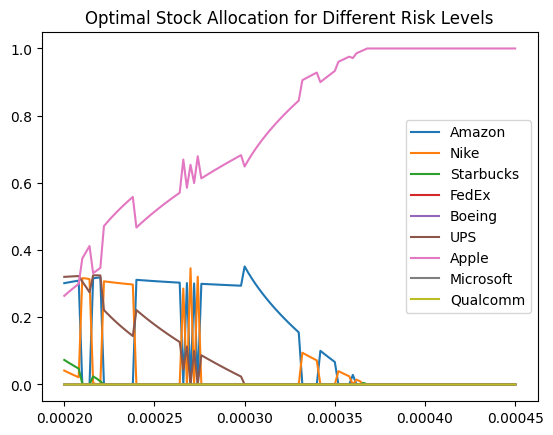

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
# param_analysis = a
param_analysis.columns = ['Amazon', 'Nike', 'Starbucks', 'FedEx', 'Boeing','UPS','Apple','Microsoft','Qualcomm']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

In [ ]:
# they all sum to one
pd.DataFrame(param_analysis.sum(axis=1)).describe()

,0
count,1.260000e+02
mean,1.000000e+00
std,9.262215e-17
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


## 2.3 Plot with efficient frontier




In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward)

[0.0002, 0.000202, 0.000204, 0.000206, 0.000208, 0.00020999999999999998, 0.00021199999999999998, 0.00021399999999999997, 0.00021599999999999996, 0.00021799999999999996, 0.00021999999999999995, 0.00022199999999999995, 0.00022399999999999994, 0.00022599999999999994, 0.00022799999999999993, 0.00022999999999999993, 0.00023199999999999992, 0.00023399999999999991, 0.0002359999999999999, 0.0002379999999999999, 0.0002399999999999999, 0.0002419999999999999, 0.0002439999999999999, 0.0002459999999999999, 0.00024799999999999985, 0.0002499999999999999, 0.00025199999999999984, 0.0002539999999999999, 0.0002559999999999998, 0.0002579999999999999, 0.0002599999999999998, 0.00026199999999999986, 0.0002639999999999998, 0.00026599999999999985, 0.0002679999999999998, 0.00026999999999999984, 0.0002719999999999998, 0.00027399999999999983, 0.00027599999999999977, 0.0002779999999999998, 0.00027999999999999976, 0.0002819999999999998, 0.00028399999999999975, 0.0002859999999999998, 0.00028799999999999974, 0.000289

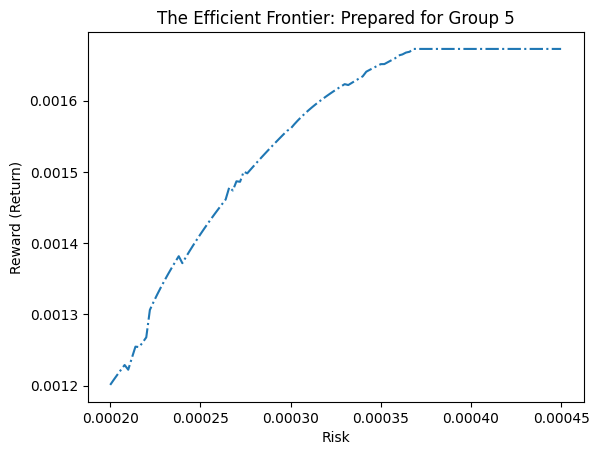

In [ ]:
# plot efficient frontier using pylab
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier: Prepared for Group 5')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

## 2.4 Portfolio selection

In [ ]:
param_analysis.reset_index(inplace = True)
param_analysis = param_analysis.rename(columns = {'index':'risk_level'}) # rename index column to risk level
param_analysis

,risk_level,Amazon,Nike,Starbucks,FedEx,Boeing,UPS,Apple,Microsoft,Qualcomm
0,0.000200,0.301517,0.041361,0.073060,0.000003,0.000004,0.320276,0.263774,2.542490e-06,2.474203e-06
1,0.000202,0.303516,0.036125,0.066287,0.000003,0.000004,0.320920,0.273140,2.549026e-06,2.483676e-06
2,0.000204,0.305452,0.031030,0.059767,0.000001,0.000001,0.321559,0.282187,9.048498e-07,8.716958e-07
3,0.000206,0.307322,0.026127,0.053426,0.000003,0.000003,0.322156,0.290957,2.507621e-06,2.422704e-06
4,0.000208,0.309139,0.021364,0.047275,0.000003,0.000004,0.322742,0.299468,2.503969e-06,2.424971e-06
...,...,...,...,...,...,...,...,...,...,...
121,0.000442,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.999984,1.635414e-06,1.631131e-06
122,0.000444,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.999984,1.636016e-06,1.631827e-06
123,0.000446,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.999984,1.636567e-06,1.632461e-06
124,0.000448,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.999984,1.637074e-06,1.633044e-06


In [ ]:
#param_analysis = param_analysis[param_analysis['risk_level'].between(0.00024, 0.00265)]
param_analysis_ = param_analysis[(param_analysis['Apple'] >= 0.4) & (param_analysis['Apple'] <= 0.6)]
param_analysis_ = param_analysis_.round(decimals = 6)
param_analysis_

,risk_level,Amazon,Nike,Starbucks,FedEx,Boeing,UPS,Apple,Microsoft,Qualcomm
7,0.000214,0.000006,0.313547,0.000010,0.000003,0.000002,0.274395,0.412032,0.000003,0.000002
11,0.000222,0.000004,0.307036,0.000005,0.000003,0.000002,0.221541,0.471405,0.000003,0.000002
12,0.000224,0.000003,0.305658,0.000005,0.000003,0.000002,0.210354,0.483971,0.000002,0.000002
13,0.000226,0.000003,0.304347,0.000005,0.000003,0.000002,0.199722,0.495914,0.000002,0.000002
14,0.000228,0.000003,0.303097,0.000004,0.000003,0.000002,0.189571,0.507316,0.000002,0.000002
15,0.000230,0.000003,0.301898,0.000004,0.000003,0.000002,0.179840,0.518246,0.000002,0.000002
16,0.000232,0.000003,0.300745,0.000004,0.000003,0.000002,0.170481,0.528758,0.000002,0.000002
17,0.000234,0.000003,0.299633,0.000004,0.000003,0.000002,0.161455,0.538896,0.000002,0.000002
18,0.000236,0.000003,0.298558,0.000004,0.000003,0.000002,0.152729,0.548698,0.000002,0.000002
19,0.000238,0.000003,0.297517,0.000004,0.000003,0.000002,0.144273,0.558195,0.000002,0.000002


####We are going ahead with the portfolio at the risk 0.000230.

####Allocated stocks as part of the portfolio are :

####Nike (NKE) - 0.3034 (30.34%)

####UPS - 0.1798 (17.98%)

####Apple (AAPL) - 0.5168 (51.68%)

Initially, we examined the distribution of risk levels in the portfolio and observed that a significant portion of the allocation (towards the upper end) had Apple in a dominant position, accounting for 99% of the portfolio. To improve diversification, we narrowed down our analysis to risk levels between 0.0024 and 0.00265, where the selection of stocks was relatively similar across different risk levels. In this range, we opted for the least risky option to balance risk and return effectively.

In [ ]:
nike_shares = 0.3034  #Nike allocation
ups_shares = 0.1798    #UPS allocation
apple_shares = 0.5168  #Apple allocation

In [ ]:
investment = 100000   #Total amount that will be invested

In [ ]:
# investment in each stock

nike_investment = nike_shares*investment
print("Nike Investment: $" + str(round(nike_investment, 4)))   #Nike investment
ups_investment = ups_shares*investment
print("UPS Investment: $" + str(round(ups_investment, 4)))   #Nike investment
apple_investment = apple_shares*investment
print("Apple Investment: $" + str(round(apple_investment, 4)))   #Nike investment

Nike Investment: $30340.0
UPS Investment: $17980.0
Apple Investment: $51680.0


# 3 - Analysis

## 3.1 - Buy-and-Hold strategy for the MPT portfolio

In [ ]:
# three sectors:
tickers_ = ['NKE','UPS','AAPL']
dow_prices = {ticker : si.get_data(ticker,start_date = '12/2/2021',end_date='1/1/2023',interval='1d') for ticker in tickers_}

# extract just the data we need (adjclose)
# get the adjclose price for the MSFT (one sample)
data = pd.DataFrame(dow_prices['NKE']['adjclose']).rename(columns = {"adjclose":"NKE"})

# combine all the tickers (all the rest of the samples)
for i in tickers_[0:]:
  data[i] = pd.DataFrame(dow_prices[i]['adjclose'])

data.head()

,NKE,UPS,AAPL
2021-12-02,167.413818,191.806961,162.566849
2021-12-03,167.951508,192.603363,160.660828
2021-12-06,166.639359,193.879532,164.115479
2021-12-07,168.987366,197.074707,169.932770
2021-12-08,167.961349,196.431854,173.804367


In [ ]:
# Add 'Buy and Hold' return

# Create the logclose price and calculate return for each stock
# for loop with f-strings to create logclose columns
for x in ['NKE','UPS','AAPL']:
  data[f'logClose_{x}'] = np.log(data[f'{x}'])

# for loop with f-strings to create return columns
for x in ['NKE','UPS','AAPL']:
  data[f'return_{x}'] = data[f'logClose_{x}'].diff()

# set the first record to 0
for x in ['NKE','UPS','AAPL']:
  data.loc['2021-12-30',f'return_{x}'] = 0.0
  data.loc['2021-12-31',f'return_{x}'] = 0.0
  data.loc['2017-01-03',f'return_{x}'] = 0.0

data.head()

,NKE,UPS,AAPL,logClose_NKE,logClose_UPS,logClose_AAPL,return_NKE,return_UPS,return_AAPL
2021-12-02,167.413818,191.806961,162.566849,5.120469,5.256489,5.091089,NaN,NaN,NaN
2021-12-03,167.951508,192.603363,160.660828,5.123675,5.260633,5.079295,0.003207,0.004144,-0.011794
2021-12-06,166.639359,193.879532,164.115479,5.115832,5.267237,5.100570,-0.007843,0.006604,0.021275
2021-12-07,168.987366,197.074707,169.932770,5.129824,5.283583,5.135403,0.013992,0.016346,0.034833
2021-12-08,167.961349,196.431854,173.804367,5.123734,5.280316,5.157930,-0.006090,-0.003267,0.022527


In [ ]:
# Add Return value, aggregate value of each stock and aggregate value of portfolio
# Bringing in the porportion of each stock that consists of our portfolio and our total investment

Nike_allocation = 0.3034 # allocation of NKE
UPS_allocation = 0.1798 # allocation of AAPL
Apple_allocation = 0.5168 # allocation of UPS

investment = 100000 # total investment

# create the daily money amount volatility columns of each stock
data['returnVal_NKE'] = Nike_allocation* investment * data['return_NKE']
data['returnVal_AAPL'] = Apple_allocation * investment * data['return_AAPL']
data['returnVal_UPS'] = UPS_allocation* investment * data['return_UPS']


# create the aggregate value columns of each stock
data['aggVal_NKE'] = data['returnVal_NKE'] + (Nike_allocation * investment)
data['aggVal_AAPL'] = data['returnVal_AAPL'] + (Apple_allocation * investment)
data['aggVal_UPS'] = data['returnVal_UPS'] + (UPS_allocation * investment)

# create the aggregate value columns of portfolio
data['aggVal_portfolio'] = data['aggVal_NKE'] + data['aggVal_AAPL'] + data['aggVal_UPS']

In [ ]:
data

,NKE,UPS,AAPL,logClose_NKE,logClose_UPS,logClose_AAPL,return_NKE,return_UPS,return_AAPL,returnVal_NKE,returnVal_AAPL,returnVal_UPS,aggVal_NKE,aggVal_AAPL,aggVal_UPS,aggVal_portfolio
2021-12-02,167.413818,191.806961,162.566849,5.120469,5.256489,5.091089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-03,167.951508,192.603363,160.660828,5.123675,5.260633,5.079295,0.003207,0.004144,-0.011794,97.287962,-609.504200,74.500226,30437.287962,51070.495800,18054.500226,99562.283988
2021-12-06,166.639359,193.879532,164.115479,5.115832,5.267237,5.100570,-0.007843,0.006604,0.021275,-237.967083,1099.483479,118.740566,30102.032917,52779.483479,18098.740566,100980.256962
2021-12-07,168.987366,197.074707,169.932770,5.129824,5.283583,5.135403,0.013992,0.016346,0.034833,424.517451,1800.147197,293.898994,30764.517451,53480.147197,18273.898994,102518.563642
2021-12-08,167.961349,196.431854,173.804367,5.123734,5.280316,5.157930,-0.006090,-0.003267,0.022527,-184.772503,1164.218748,-58.746178,30155.227497,52844.218748,17921.253822,100920.700066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,117.225746,175.385254,129.831772,4.764102,5.166985,4.866240,0.011206,-0.000452,-0.013976,339.983645,-722.256687,-8.127767,30679.983645,50957.743313,17971.872233,99609.599191
2022-12-28,114.653084,172.094238,125.847855,4.741911,5.148042,4.835074,-0.022191,-0.018943,-0.031166,-673.263521,-1610.652445,-340.591210,29666.736479,50069.347555,17639.408790,97375.492824
2022-12-29,117.016342,174.215561,129.412415,4.762314,5.160293,4.863004,0.020403,0.012251,0.027931,619.017772,1443.455606,220.275938,30959.017772,53123.455606,18200.275938,102282.749316
2022-12-30,116.677315,172.322235,129.731918,4.759412,5.149366,4.865470,-0.002901,-0.010927,0.002466,-88.030619,127.434498,-196.471133,30251.969381,51807.434498,17783.528867,99842.932745


In [ ]:
# using 1.5.3 pandas for resample
!pip install pandas==1.5.3

# reset index and name it date

data.reset_index()
df = data.rename(columns={'index': 'date'})

# subset the first day of each month
# To run resample on local (Sometimes Pandas in colab is throwing errors , due to problems in pandas installation)
#df.to_pickle('df.zip') # zipping dataframe to resample on local (jupyter notebook)


new_data = df.resample('MS').first()
#new_data = pd.read_pickle('new_data.zip') # unzipping on colab to get back resampled dataframe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
idaes-pse 2.0.0 requires pandas<1.5, but you have pandas 1.5.3 which is incompatible.


In [ ]:
new_data

,NKE,UPS,AAPL,logClose_NKE,logClose_UPS,logClose_AAPL,return_NKE,return_UPS,return_AAPL,returnVal_NKE,returnVal_AAPL,returnVal_UPS,aggVal_NKE,aggVal_AAPL,aggVal_UPS,aggVal_portfolio
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30340.000000,51680.000000,17980.000000,100000.000000
2017-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,113.300812,190.413559,160.773376,4.730046,5.249198,5.079996,-0.005410,0.002306,-0.006173,-164.128696,-318.998055,41.465795,30175.871304,51361.001945,18021.465795,99558.339044
2022-09-01,105.559082,193.087219,157.457993,4.659271,5.263142,5.059159,0.000376,0.010739,0.004696,11.400605,242.678186,193.080047,30351.400605,51922.678186,18173.080047,100447.158838
2022-10-01,84.896599,160.167801,141.997284,4.441434,5.076222,4.955808,0.027061,0.009549,0.030289,821.021638,1565.350015,171.698824,31161.021638,53245.350015,18151.698824,102558.070477
2022-11-01,93.217255,164.400574,150.171219,4.534933,5.102306,5.011776,0.011692,-0.002208,-0.017698,354.742860,-914.656197,-39.697144,30694.742860,50765.343803,17940.302856,99400.389519


In [ ]:
new_data.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
      

In [ ]:
new_data

,NKE,UPS,AAPL,logClose_NKE,logClose_UPS,logClose_AAPL,return_NKE,return_UPS,return_AAPL,returnVal_NKE,returnVal_AAPL,returnVal_UPS,aggVal_NKE,aggVal_AAPL,aggVal_UPS,aggVal_portfolio
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30340.000000,51680.000000,17980.000000,100000.000000
2017-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,113.300812,190.413559,160.773376,4.730046,5.249198,5.079996,-0.005410,0.002306,-0.006173,-164.128696,-318.998055,41.465795,30175.871304,51361.001945,18021.465795,99558.339044
2022-09-01,105.559082,193.087219,157.457993,4.659271,5.263142,5.059159,0.000376,0.010739,0.004696,11.400605,242.678186,193.080047,30351.400605,51922.678186,18173.080047,100447.158838
2022-10-01,84.896599,160.167801,141.997284,4.441434,5.076222,4.955808,0.027061,0.009549,0.030289,821.021638,1565.350015,171.698824,31161.021638,53245.350015,18151.698824,102558.070477
2022-11-01,93.217255,164.400574,150.171219,4.534933,5.102306,5.011776,0.011692,-0.002208,-0.017698,354.742860,-914.656197,-39.697144,30694.742860,50765.343803,17940.302856,99400.389519


In [ ]:
#Aggregate Value on the first day of each month

# create a table showing the aggregate value of the whole porfolio
new_data_display = new_data.drop(columns=new_data.columns.difference(['aggVal_NKE','aggVal_UPS','aggVal_AAPL','aggVal_portfolio']))
new_data_display
# for buy and hold case, amount of money invested on the first day of each month equals to aggregate value on the first day

,aggVal_NKE,aggVal_AAPL,aggVal_UPS,aggVal_portfolio
2017-01-01,30340.000000,51680.000000,17980.000000,100000.000000
2017-02-01,NaN,NaN,NaN,NaN
2017-03-01,NaN,NaN,NaN,NaN
2017-04-01,NaN,NaN,NaN,NaN
2017-05-01,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-08-01,30175.871304,51361.001945,18021.465795,99558.339044
2022-09-01,30351.400605,51922.678186,18173.080047,100447.158838
2022-10-01,31161.021638,53245.350015,18151.698824,102558.070477
2022-11-01,30694.742860,50765.343803,17940.302856,99400.389519


## 3.2 - Momentum trading strategy for each stock in the MPT portfolio

### Nike Stocks!

In [ ]:
ticker = "NKE"
nke = si.get_data(ticker,start_date = '12/2/2021',end_date='1/1/2023',interval='1d')
day = np.arange(1, len(nke) + 1) #generate list of trading days
nke['Day'] = day
# Dropping columns I don't want to use
nke.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
nke = nke[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
nke.columns = ['Day', 'Open', 'High', 'Low', 'Close']
nke.head()

,Day,Open,High,Low,Close
2021-12-02,1,167.279999,170.550003,167.000000,170.000000
2021-12-03,2,170.619995,172.070007,166.759995,170.240005
2021-12-06,3,170.830002,171.210007,168.059998,168.910004
2021-12-07,4,171.110001,173.350006,170.399994,171.289993
2021-12-08,5,171.220001,171.789993,169.839996,170.250000


In [ ]:
# calculate rolling averages
nke['8-day'] = nke['Close'].rolling(8).mean()
nke['21-day'] = nke['Close'].rolling(21).mean()
nke.head(n=10)

,Day,Open,High,Low,Close,8-day,21-day
2021-12-02,1,167.279999,170.550003,167.000000,170.000000,NaN,NaN
2021-12-03,2,170.619995,172.070007,166.759995,170.240005,NaN,NaN
2021-12-06,3,170.830002,171.210007,168.059998,168.910004,NaN,NaN
2021-12-07,4,171.110001,173.350006,170.399994,171.289993,NaN,NaN
2021-12-08,5,171.220001,171.789993,169.839996,170.250000,NaN,NaN
2021-12-09,6,169.289993,171.169998,167.990005,168.100006,NaN,NaN
2021-12-10,7,168.500000,170.240005,167.330002,169.059998,NaN,NaN
2021-12-13,8,168.809998,169.389999,165.259995,166.839996,169.336250,NaN
2021-12-14,9,166.289993,167.080002,164.210007,165.399994,168.761250,NaN
2021-12-15,10,165.000000,165.669998,161.820007,163.899994,167.968748,NaN


In [ ]:
# shift results by one row so that they represent the averages for the previous 8 and 21 days, and removing missing values
nke['8-day'] = nke['Close'].rolling(8).mean().shift()
nke['21-day'] = nke['Close'].rolling(21).mean().shift()
nke.dropna(inplace=True)
nke.head(n=10)

,Day,Open,High,Low,Close,8-day,21-day
2022-01-03,22,167.529999,167.910004,163.309998,164.669998,166.835001,166.653809
2022-01-04,23,165.880005,167.179993,165.000000,166.389999,166.590000,166.400000
2022-01-05,24,166.490005,167.009995,162.100006,162.250000,166.708750,166.216666
2022-01-06,25,162.089996,163.190002,159.059998,161.039993,166.281250,165.899523
2022-01-07,26,160.770004,161.139999,156.860001,156.970001,165.463749,165.411428
2022-01-10,27,150.520004,151.330002,148.779999,150.440002,164.282499,164.779047
2022-01-11,28,150.479996,150.839996,147.600006,150.300003,161.990000,163.938094
2022-01-12,29,152.130005,153.460007,150.740005,152.210007,159.841249,163.044761
2022-01-13,30,153.199997,153.600006,149.020004,149.589996,158.033751,162.348095
2022-01-14,31,148.389999,148.839996,146.850006,148.179993,156.148750,161.595238


In [ ]:
nke['logClose'] = np.log(nke['Close']) # price will always be positive, so this operation is well-defined
nke['return'] = nke['logClose'].diff() # the difference will be positive or negative
nke.head()

,Day,Open,High,Low,Close,8-day,21-day,logClose,return
2022-01-03,22,167.529999,167.910004,163.309998,164.669998,166.835001,166.653809,5.103943,NaN
2022-01-04,23,165.880005,167.179993,165.000000,166.389999,166.590000,166.400000,5.114334,0.010391
2022-01-05,24,166.490005,167.009995,162.100006,162.250000,166.708750,166.216666,5.089138,-0.025196
2022-01-06,25,162.089996,163.190002,159.059998,161.039993,166.281250,165.899523,5.081653,-0.007486
2022-01-07,26,160.770004,161.139999,156.860001,156.970001,165.463749,165.411428,5.056055,-0.025598


#### Add 'invested' column

The purpose of this column is to show whether we are currently investing money or if we are out of the market. More precisely, invested = 1 if the 8-day average is greater than the 21-day average.

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
# create new column where value is 1 when the 8-day moving average is greater than the 21-day moving average, and 0 otherwise
nke['invested'] = np.where(nke['8-day'] > nke['21-day'], 1, 0)
nke.head()

,Day,Open,High,Low,Close,8-day,21-day,logClose,return,invested
2022-01-03,22,167.529999,167.910004,163.309998,164.669998,166.835001,166.653809,5.103943,NaN,1
2022-01-04,23,165.880005,167.179993,165.000000,166.389999,166.590000,166.400000,5.114334,0.010391,1
2022-01-05,24,166.490005,167.009995,162.100006,162.250000,166.708750,166.216666,5.089138,-0.025196,1
2022-01-06,25,162.089996,163.190002,159.059998,161.039993,166.281250,165.899523,5.081653,-0.007486,1
2022-01-07,26,160.770004,161.139999,156.860001,156.970001,165.463749,165.411428,5.056055,-0.025598,1


In [ ]:
print(nke['invested'].value_counts())

0    152
1     99
Name: invested, dtype: int64


#### Entering and leaving the market using the momentum trading strategy

Now we make a column called 'signal' which tells us when to enter and leave the market based on the momentum trading strategy. We want to buy/sell at the transition points, i.e., when the plots are intersecting and the trend is changing.

A value of +1 indicates that we should buy, and a value of -1 indicates that we should sell. This happens when the trend flips.

In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
nke['signal'] = nke['invested'].diff()
print(nke['signal'].value_counts())

 0.0    240
-1.0      5
 1.0      5
Name: signal, dtype: int64


In [ ]:
nke.loc["2021-01-03",'signal'] = 1.0
nke.head()

,Day,Open,High,Low,Close,8-day,21-day,logClose,return,invested,signal
2022-01-03,22.0,167.529999,167.910004,163.309998,164.669998,166.835001,166.653809,5.103943,NaN,1.0,NaN
2022-01-04,23.0,165.880005,167.179993,165.000000,166.389999,166.590000,166.400000,5.114334,0.010391,1.0,0.0
2022-01-05,24.0,166.490005,167.009995,162.100006,162.250000,166.708750,166.216666,5.089138,-0.025196,1.0,0.0
2022-01-06,25.0,162.089996,163.190002,159.059998,161.039993,166.281250,165.899523,5.081653,-0.007486,1.0,0.0
2022-01-07,26.0,160.770004,161.139999,156.860001,156.970001,165.463749,165.411428,5.056055,-0.025598,1.0,0.0


#### Let's see trading days

In [ ]:
# filter out rows that correspond to periods when a trading signal was generated
nke[nke['signal'].isin([1,-1])]

,Day,Open,High,Low,Close,8-day,21-day,logClose,return,invested,signal
2022-01-10,27.0,150.520004,151.330002,148.779999,150.440002,164.282499,164.779047,5.013564,-0.042490,0.0,-1.0
2022-03-28,80.0,133.759995,134.860001,132.169998,134.809998,130.737501,129.168095,4.903866,0.008268,1.0,1.0
2022-04-13,92.0,125.040001,127.860001,125.040001,127.489998,129.508751,130.877143,4.848038,0.019404,0.0,-1.0
2022-04-26,100.0,126.949997,127.589996,120.480003,120.519997,132.246253,132.132858,4.791816,-0.059746,1.0,1.0
2022-04-27,101.0,121.089996,124.000000,121.089996,121.239998,131.375003,131.505239,4.797772,0.005956,0.0,-1.0
2022-06-03,127.0,120.209999,122.540001,120.000000,120.949997,114.248750,113.095714,4.795377,-0.020135,1.0,1.0
2022-06-21,138.0,108.459999,109.820000,108.040001,108.680000,113.098751,114.098572,4.688408,0.012406,0.0,-1.0
2022-07-22,160.0,111.930000,111.930000,108.750000,109.120003,106.581251,106.100477,4.692448,-0.022652,1.0,1.0
2022-08-26,185.0,113.309998,113.730003,108.230003,108.279999,113.740001,113.786191,4.684720,-0.044612,0.0,-1.0
2022-10-27,228.0,92.879997,93.480003,90.220001,90.540001,89.458751,89.313810,4.505792,-0.020227,1.0,1.0


#### System Return

Let's see now how much money this strategy is making (or losing!!!). Note that our investment will only change when we are invested.

In [ ]:
# The 'system_return' tells you how much money you would have made
# using the momentum trading algorithm
nke['system_return'] = nke['invested'] * nke['return']
nke.head()

,Day,Open,High,Low,Close,8-day,21-day,logClose,return,invested,signal,system_return
2022-01-03,22.0,167.529999,167.910004,163.309998,164.669998,166.835001,166.653809,5.103943,NaN,1.0,NaN,NaN
2022-01-04,23.0,165.880005,167.179993,165.000000,166.389999,166.590000,166.400000,5.114334,0.010391,1.0,0.0,0.010391
2022-01-05,24.0,166.490005,167.009995,162.100006,162.250000,166.708750,166.216666,5.089138,-0.025196,1.0,0.0,-0.025196
2022-01-06,25.0,162.089996,163.190002,159.059998,161.039993,166.281250,165.899523,5.081653,-0.007486,1.0,0.0,-0.007486
2022-01-07,26.0,160.770004,161.139999,156.860001,156.970001,165.463749,165.411428,5.056055,-0.025598,1.0,0.0,-0.025598


What was the return of this strategy?

In [ ]:
nike_system_return = (np.exp(np.sum(nke['system_return']))-1)*nike_investment
nike_system_return

-1870.5914476464202

#### Plot trades on time series for the year 2022

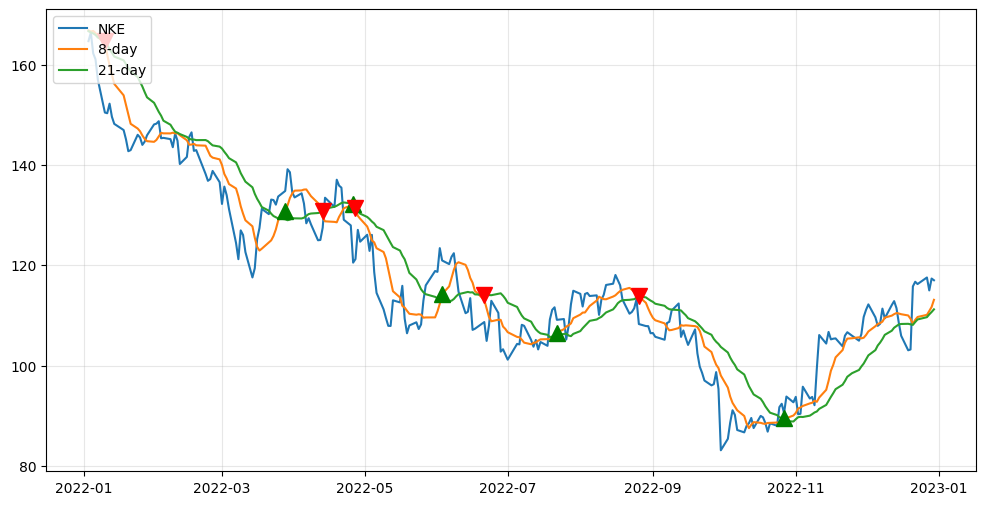

In [ ]:
# show the last year
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(nke.iloc[-252:]['Close'], label = 'NKE') # actual value
plt.plot(nke.iloc[-252:]['8-day'], label = '8-day') # 8-day average
plt.plot(nke.iloc[-252:]['21-day'], label = '21-day') # 21-day average
plt.plot(nke[-252:].loc[nke.signal == 1].index, nke[-252:]['8-day'][nke.signal == 1], '^',
         color = 'g', markersize = 12)
plt.plot(nke[-252:].loc[nke.signal == -1].index, nke[-252:]['21-day'][nke.signal == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

#### Nike investments amounts on first day of every month of 2022

In [ ]:
# Add Return value, aggregate value of each stock and aggregate value of portfolio
# Bringing in the porportion of each stock that consists of our portfolio and our total investment

Nike_allocation = 0.3034 # allocation of NKE

investment = 100000 # total investment

# create the daily money amount volatility columns of each stock
nke['returnVal_NKE'] = Nike_allocation* investment * nke['system_return']

# create the aggregate value columns of each stock
nke['aggVal_NKE'] = nke['returnVal_NKE'] + (Nike_allocation * investment)

nke

,Day,Open,High,Low,Close,8-day,21-day,logClose,return,invested,signal,system_return,returnVal_NKE,aggVal_NKE
2022-01-03,22.0,167.529999,167.910004,163.309998,164.669998,166.835001,166.653809,5.103943,NaN,1.0,NaN,NaN,NaN,NaN
2022-01-04,23.0,165.880005,167.179993,165.000000,166.389999,166.590000,166.400000,5.114334,0.010391,1.0,0.0,0.010391,315.261928,30655.261928
2022-01-05,24.0,166.490005,167.009995,162.100006,162.250000,166.708750,166.216666,5.089138,-0.025196,1.0,0.0,-0.025196,-764.448799,29575.551201
2022-01-06,25.0,162.089996,163.190002,159.059998,161.039993,166.281250,165.899523,5.081653,-0.007486,1.0,0.0,-0.007486,-227.113588,30112.886412
2022-01-07,26.0,160.770004,161.139999,156.860001,156.970001,165.463749,165.411428,5.056055,-0.025598,1.0,0.0,-0.025598,-776.644157,29563.355843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,269.0,116.470001,118.199997,115.820000,117.559998,110.113750,109.650476,4.766949,0.011206,1.0,0.0,0.011206,339.983253,30679.983253
2022-12-28,270.0,117.580002,118.239998,114.959999,114.980003,110.877500,110.202857,4.744758,-0.022191,1.0,0.0,-0.022191,-673.262543,29666.737457
2022-12-29,271.0,116.080002,118.070000,115.800003,117.349998,111.686250,110.680000,4.765161,0.020403,1.0,0.0,0.020403,619.017308,30959.017308
2022-12-30,272.0,116.559998,117.250000,115.769997,117.010002,113.111250,111.208571,4.762259,-0.002901,1.0,0.0,-0.002901,-88.031201,30251.968799


In [ ]:
!pip install pandas==1.5.3

# reset index and name it date

data.reset_index()
df = nke.rename(columns={'index': 'date'})

# subset the first day of each month
# To run resample on local (Sometimes Pandas in colab is throwing errors , due to problems in pandas installation)
#df.to_pickle('df.zip') # zipping dataframe to resample on local (jupyter notebook)


nke = df.resample('MS').first()
#new_data = pd.read_pickle('new_data.zip') # unzipping on colab to get back resampled dataframe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nke.index

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
#Aggregate Value on the first day of each month

# create a table showing the aggregate value of the whole porfolio
nke_display = nke.drop(columns=nke.columns.difference(['aggVal_NKE']))
nke_display
# for buy and hold case, amount of money invested on the first day of each month equals to aggregate value on the first day

,aggVal_NKE
2021-01-01,NaN
2021-02-01,NaN
2021-03-01,NaN
2021-04-01,NaN
2021-05-01,NaN
2021-06-01,NaN
2021-07-01,NaN
2021-08-01,NaN
2021-09-01,NaN
2021-10-01,NaN


### UPS Stocks!

In [ ]:
ticker = "UPS"
ups = si.get_data(ticker,start_date = '12/2/2021',end_date='1/1/2023',interval='1d')
day = np.arange(1, len(ups) + 1) #generate list of trading days
ups['Day'] = day
# Dropping columns I don't want to use
ups.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
ups = ups[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
ups.columns = ['Day', 'Open', 'High', 'Low', 'Close']
ups.head()

,Day,Open,High,Low,Close
2021-12-02,1,195.279999,200.630005,193.820007,199.899994
2021-12-03,2,201.039993,202.630005,197.759995,200.729996
2021-12-06,3,201.990005,204.610001,201.380005,202.059998
2021-12-07,4,204.330002,205.889999,203.380005,205.389999
2021-12-08,5,206.020004,207.490005,203.389999,204.720001


In [ ]:
# calculate rolling averages
# data leakage because it includes the 8th day
ups['9-day'] = ups['Close'].rolling(8).mean()
ups['21-day'] = ups['Close'].rolling(21).mean()
ups.head(n=10)

,Day,Open,High,Low,Close,9-day,21-day
2021-12-02,1,195.279999,200.630005,193.820007,199.899994,NaN,NaN
2021-12-03,2,201.039993,202.630005,197.759995,200.729996,NaN,NaN
2021-12-06,3,201.990005,204.610001,201.380005,202.059998,NaN,NaN
2021-12-07,4,204.330002,205.889999,203.380005,205.389999,NaN,NaN
2021-12-08,5,206.020004,207.490005,203.389999,204.720001,NaN,NaN
2021-12-09,6,204.050003,207.889999,203.759995,206.539993,NaN,NaN
2021-12-10,7,208.000000,209.860001,207.339996,209.110001,NaN,NaN
2021-12-13,8,206.949997,209.320007,205.619995,206.309998,204.344997,NaN
2021-12-14,9,205.199997,207.149994,203.080002,203.740005,204.824999,NaN
2021-12-15,10,206.649994,208.440002,204.520004,205.770004,205.455000,NaN


In [ ]:
# rolled back (no data leakage)
# since this cell is run after, this overwrites the previous data leakage
ups['8-day'] = ups['Close'].rolling(8).mean().shift()
ups['21-day'] = ups['Close'].rolling(21).mean().shift()
ups.dropna(inplace=True)
ups.head(n=10)

,Day,Open,High,Low,Close,9-day,21-day,8-day
2022-01-03,22,214.649994,215.649994,210.869995,213.500000,213.344999,207.696190,212.545000
2022-01-04,23,214.399994,218.660004,213.600006,217.289993,214.451248,208.343809,213.344999
2022-01-05,24,216.800003,217.979996,214.220001,214.559998,214.747498,209.132380,214.451248
2022-01-06,25,215.059998,217.130005,213.330002,216.639999,214.938747,209.727618,214.747498
2022-01-07,26,217.350006,219.449997,215.179993,218.160004,215.373749,210.263333,214.938747
2022-01-10,27,217.050003,217.229996,210.610001,211.729996,215.014997,210.903333,215.373749
2022-01-11,28,211.500000,211.500000,208.039993,211.270004,214.686249,211.150476,215.014997
2022-01-12,29,211.919998,213.460007,210.100006,211.220001,214.296249,211.253333,214.686249
2022-01-13,30,211.559998,213.639999,209.929993,210.470001,213.917500,211.487143,214.296249
2022-01-14,31,208.229996,209.160004,205.500000,206.539993,212.573750,211.807619,213.917500


In [ ]:
ups['logClose'] = np.log(ups['Close']) # price will always be positive, so this operation is well-defined
ups['return'] = ups['logClose'].diff() # the difference will be positive or negative
ups.head()

,Day,Open,High,Low,Close,9-day,21-day,8-day,logClose,return
2022-01-03,22,214.649994,215.649994,210.869995,213.500000,213.344999,207.696190,212.545000,5.363637,NaN
2022-01-04,23,214.399994,218.660004,213.600006,217.289993,214.451248,208.343809,213.344999,5.381233,0.017596
2022-01-05,24,216.800003,217.979996,214.220001,214.559998,214.747498,209.132380,214.451248,5.368589,-0.012643
2022-01-06,25,215.059998,217.130005,213.330002,216.639999,214.938747,209.727618,214.747498,5.378237,0.009648
2022-01-07,26,217.350006,219.449997,215.179993,218.160004,215.373749,210.263333,214.938747,5.385229,0.006992


In [ ]:
ups.loc["2018-01-29",'return'] = 0.0
ups.head()

,Day,Open,High,Low,Close,9-day,21-day,8-day,logClose,return
2022-01-03,22.0,214.649994,215.649994,210.869995,213.500000,213.344999,207.696190,212.545000,5.363637,NaN
2022-01-04,23.0,214.399994,218.660004,213.600006,217.289993,214.451248,208.343809,213.344999,5.381233,0.017596
2022-01-05,24.0,216.800003,217.979996,214.220001,214.559998,214.747498,209.132380,214.451248,5.368589,-0.012643
2022-01-06,25.0,215.059998,217.130005,213.330002,216.639999,214.938747,209.727618,214.747498,5.378237,0.009648
2022-01-07,26.0,217.350006,219.449997,215.179993,218.160004,215.373749,210.263333,214.938747,5.385229,0.006992


#### Add 'invested' column

The purpose of this column is to show whether we are currently investing money or if we are out of the market. More precisely, invested = 1 if the 8-day average is greater than the 21-day average.

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
# create new column where value is 1 when the 8-day moving average is greater than the 21-day moving average, and 0 otherwise
ups['invested'] = np.where(ups['8-day'] > ups['21-day'], 1, 0)
ups.head()

,Day,Open,High,Low,Close,9-day,21-day,8-day,logClose,return,invested
2022-01-03,22.0,214.649994,215.649994,210.869995,213.500000,213.344999,207.696190,212.545000,5.363637,NaN,1
2022-01-04,23.0,214.399994,218.660004,213.600006,217.289993,214.451248,208.343809,213.344999,5.381233,0.017596,1
2022-01-05,24.0,216.800003,217.979996,214.220001,214.559998,214.747498,209.132380,214.451248,5.368589,-0.012643,1
2022-01-06,25.0,215.059998,217.130005,213.330002,216.639999,214.938747,209.727618,214.747498,5.378237,0.009648,1
2022-01-07,26.0,217.350006,219.449997,215.179993,218.160004,215.373749,210.263333,214.938747,5.385229,0.006992,1


In [ ]:
print(ups['invested'].value_counts())

0    128
1    124
Name: invested, dtype: int64


#### Entering and leaving the market using the momentum trading strategy

Now we make a column called 'signal' which tells us when to enter and leave the market based on the momentum trading strategy. We want to buy/sell at the transition points, i.e., when the plots are intersecting and the trend is changing.

A value of +1 indicates that we should buy, and a value of -1 indicates that we should sell. This happens when the trend flips.

In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
ups['signal'] = ups['invested'].diff()
print(ups['signal'].value_counts())

 0.0    238
-1.0      7
 1.0      6
Name: signal, dtype: int64


In [ ]:
ups.loc["2021-02-03",'signal'] = 1.0
ups.head()

,Day,Open,High,Low,Close,9-day,21-day,8-day,logClose,return,invested,signal
2022-01-03,22.0,214.649994,215.649994,210.869995,213.500000,213.344999,207.696190,212.545000,5.363637,NaN,1.0,NaN
2022-01-04,23.0,214.399994,218.660004,213.600006,217.289993,214.451248,208.343809,213.344999,5.381233,0.017596,1.0,0.0
2022-01-05,24.0,216.800003,217.979996,214.220001,214.559998,214.747498,209.132380,214.451248,5.368589,-0.012643,1.0,0.0
2022-01-06,25.0,215.059998,217.130005,213.330002,216.639999,214.938747,209.727618,214.747498,5.378237,0.009648,1.0,0.0
2022-01-07,26.0,217.350006,219.449997,215.179993,218.160004,215.373749,210.263333,214.938747,5.385229,0.006992,1.0,0.0


#### Let's see trading days

In [ ]:
ups[ups['signal'].isin([1,-1])]

,Day,Open,High,Low,Close,9-day,21-day,8-day,logClose,return,invested,signal
2022-01-19,33.0,205.050003,207.250000,203.460007,203.759995,209.842499,211.730951,211.452499,5.316943,-0.008941,0.0,-1.0
2022-02-04,45.0,227.289993,227.820007,222.919998,224.789993,213.821251,209.810952,210.965002,5.415167,-0.017201,1.0,1.0
2022-02-23,57.0,209.470001,210.960007,204.169998,204.479996,211.696251,214.368572,213.721251,5.320470,-0.021721,0.0,-1.0
2022-03-18,74.0,220.979996,221.199997,216.839996,219.779999,211.586248,209.226190,209.539999,5.392627,-0.011491,1.0,1.0
2022-04-07,88.0,194.440002,194.440002,189.520004,192.699997,206.657501,212.112858,210.013752,5.261135,-0.008732,0.0,-1.0
2022-06-03,127.0,182.369995,185.539993,182.070007,185.490005,180.115002,178.309046,178.727501,5.223001,0.007685,1.0,1.0
2022-06-17,137.0,171.460007,173.710007,169.460007,171.070007,174.382504,177.265715,176.187502,5.142073,-0.006526,0.0,-1.0
2022-07-01,146.0,181.779999,186.110001,181.509995,184.990005,181.058750,178.830954,179.747499,5.220302,0.013333,1.0,1.0
2022-07-22,160.0,188.639999,189.289993,185.660004,187.979996,183.314999,182.495714,182.238749,5.236336,0.005173,0.0,-1.0
2022-07-25,161.0,188.960007,189.929993,186.960007,187.910004,184.563749,183.059047,183.314999,5.235963,-0.000372,1.0,1.0


#### System Return

In [ ]:
# The 'system_return' tells you how much money you would have made
# using the momentum trading algorithm
ups['system_return'] = ups['invested'] * ups['return']
ups.head()

,Day,Open,High,Low,Close,9-day,21-day,8-day,logClose,return,invested,signal,system_return
2022-01-03,22.0,214.649994,215.649994,210.869995,213.500000,213.344999,207.696190,212.545000,5.363637,NaN,1.0,NaN,NaN
2022-01-04,23.0,214.399994,218.660004,213.600006,217.289993,214.451248,208.343809,213.344999,5.381233,0.017596,1.0,0.0,0.017596
2022-01-05,24.0,216.800003,217.979996,214.220001,214.559998,214.747498,209.132380,214.451248,5.368589,-0.012643,1.0,0.0,-0.012643
2022-01-06,25.0,215.059998,217.130005,213.330002,216.639999,214.938747,209.727618,214.747498,5.378237,0.009648,1.0,0.0,0.009648
2022-01-07,26.0,217.350006,219.449997,215.179993,218.160004,215.373749,210.263333,214.938747,5.385229,0.006992,1.0,0.0,0.006992


What is the return of this strategy?

In [ ]:
ups_system_return = (np.exp(np.sum(ups['system_return']))-1)*ups_investment
ups_system_return

-2927.5529606427326

#### Plot trades on time series for the year 2022

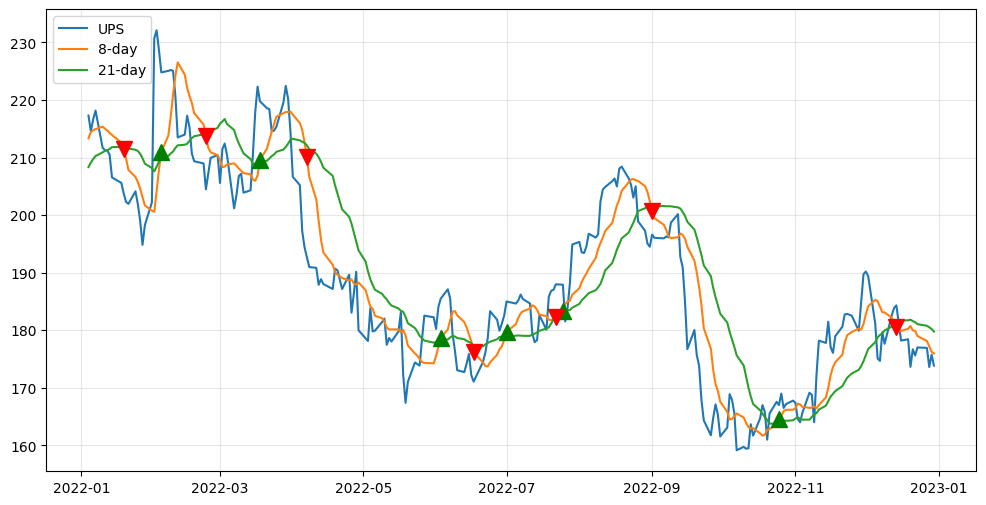

In [ ]:
# show the last year
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(ups.iloc[-252:]['Close'], label = 'UPS') # actual value
plt.plot(ups.iloc[-252:]['8-day'], label = '8-day') # 8-day average
plt.plot(ups.iloc[-252:]['21-day'], label = '21-day') # 21-day average
plt.plot(ups[-252:].loc[ups.signal == 1].index, ups[-252:]['8-day'][ups.signal == 1], '^',
         color = 'g', markersize = 12)
plt.plot(ups[-252:].loc[ups.signal == -1].index, ups[-252:]['8-day'][ups.signal == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

#### UPS investment amounts on first day of every month

In [ ]:
# Add Return value, aggregate value of each stock and aggregate value of portfolio
# Bringing in the porportion of each stock that consists of our portfolio and our total investment

ups_allocation = 0.1798 # allocation of UPS

investment = 100000 # total investment

# create the daily money amount volatility columns of each stock
ups['returnVal_UPS'] = ups_allocation* investment * ups['system_return']

# create the aggregate value columns of each stock
ups['aggVal_UPS'] = ups['returnVal_UPS'] + (ups_allocation * investment)


In [ ]:
!pip install pandas==1.5.3

# reset index and name it date

data.reset_index()
df = ups.rename(columns={'index': 'date'})


# To run resample on local (Sometimes Pandas in colab is throwing errors , due to problems in pandas installation)
#df.to_pickle('df.zip') # zipping dataframe to resample on local (jupyter notebook)

# subset the first day of each month
ups = df.resample('MS').first()

#new_data = pd.read_pickle('new_data.zip') # unzipping on colab to get back resampled dataframe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#ups.index

#Aggregate Value on the first day of each month

# create a table showing the aggregate value of the whole porfolio
ups_display = ups.drop(columns=ups.columns.difference(['aggVal_UPS']))
ups_display
# for buy and hold case, amount of money invested on the first day of each month equals to aggregate value on the first day

,aggVal_UPS
2018-01-01,17980.000000
2018-02-01,NaN
2018-03-01,NaN
2018-04-01,NaN
2018-05-01,NaN
2018-06-01,NaN
2018-07-01,NaN
2018-08-01,NaN
2018-09-01,NaN
2018-10-01,NaN


### Apple Stocks!

In [ ]:
ticker = "AAPL"
aapl = si.get_data(ticker,start_date = '12/2/2021',end_date='1/1/2023',interval='1d')
day = np.arange(1, len(aapl) + 1) #generate list of trading days
aapl['Day'] = day
# Dropping columns we don't want to use
aapl.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
aapl = aapl[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
aapl.columns = ['Day', 'Open', 'High', 'Low', 'Close']
aapl.head()

,Day,Open,High,Low,Close
2021-12-02,1,158.740005,164.199997,157.800003,163.759995
2021-12-03,2,164.020004,164.960007,159.720001,161.839996
2021-12-06,3,164.289993,167.880005,164.279999,165.320007
2021-12-07,4,169.080002,171.580002,168.339996,171.179993
2021-12-08,5,172.130005,175.960007,170.699997,175.080002


In [ ]:
# calculate rolling averages
# data leakage because it includes the 8th day
aapl['8-day'] = aapl['Close'].rolling(8).mean()
aapl['21-day'] = aapl['Close'].rolling(21).mean()
aapl.head(n=10)

,Day,Open,High,Low,Close,8-day,21-day
2021-12-02,1,158.740005,164.199997,157.800003,163.759995,NaN,NaN
2021-12-03,2,164.020004,164.960007,159.720001,161.839996,NaN,NaN
2021-12-06,3,164.289993,167.880005,164.279999,165.320007,NaN,NaN
2021-12-07,4,169.080002,171.580002,168.339996,171.179993,NaN,NaN
2021-12-08,5,172.130005,175.960007,170.699997,175.080002,NaN,NaN
2021-12-09,6,174.910004,176.750000,173.919998,174.559998,NaN,NaN
2021-12-10,7,175.210007,179.630005,174.690002,179.449997,NaN,NaN
2021-12-13,8,181.119995,182.130005,175.529999,175.740005,170.866249,NaN
2021-12-14,9,175.250000,177.740005,172.210007,174.330002,172.187500,NaN
2021-12-15,10,175.110001,179.500000,172.309998,179.300003,174.370001,NaN


In [ ]:
# rolled back (no data leakage)
# since this cell is run after, this overwrites the previous data leakage
aapl['8-day'] = aapl['Close'].rolling(8).mean().shift()
aapl['21-day'] = aapl['Close'].rolling(21).mean().shift()
aapl.dropna(inplace=True)
aapl.head(n=10)

,Day,Open,High,Low,Close,8-day,21-day
2022-01-03,22,177.830002,182.880005,177.710007,182.009995,177.460001,173.970952
2022-01-04,23,182.630005,182.940002,179.119995,179.699997,178.587500,174.840000
2022-01-05,24,179.610001,180.169998,174.639999,174.919998,179.094999,175.690476
2022-01-06,25,172.699997,175.300003,171.639999,172.000000,178.924999,176.147619
2022-01-07,26,172.889999,174.139999,171.029999,172.169998,177.883749,176.186667
2022-01-10,27,169.080002,172.500000,168.169998,172.190002,176.993750,176.048095
2022-01-11,28,172.320007,175.179993,170.820007,175.080002,176.094999,175.935238
2022-01-12,29,176.119995,177.179993,174.820007,175.529999,175.705000,175.727143
2022-01-13,30,175.779999,176.619995,171.789993,172.190002,175.449999,175.717143
2022-01-14,31,171.339996,173.779999,171.089996,173.070007,174.222500,175.615238


In [ ]:
aapl.loc["2018-01-29",'return'] = 0.0
aapl.head()

,Day,Open,High,Low,Close,8-day,21-day,return
2022-01-03,22.0,177.830002,182.880005,177.710007,182.009995,177.460001,173.970952,NaN
2022-01-04,23.0,182.630005,182.940002,179.119995,179.699997,178.587500,174.840000,NaN
2022-01-05,24.0,179.610001,180.169998,174.639999,174.919998,179.094999,175.690476,NaN
2022-01-06,25.0,172.699997,175.300003,171.639999,172.000000,178.924999,176.147619,NaN
2022-01-07,26.0,172.889999,174.139999,171.029999,172.169998,177.883749,176.186667,NaN


#### Add "invested" column

The purpose of this column is to show whether we are currently investing money or if we are out of the market. More precisely, invested = 1 if the 8-day average is greater than the 21-day average.

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
# create new column where value is 1 when the 8-day moving average is greater than the 21-day moving average, and 0 otherwise
aapl['invested'] = np.where(aapl['8-day'] > aapl['21-day'], 1, 0)
aapl.head()

,Day,Open,High,Low,Close,8-day,21-day,return,invested
2022-01-03,22.0,177.830002,182.880005,177.710007,182.009995,177.460001,173.970952,NaN,1
2022-01-04,23.0,182.630005,182.940002,179.119995,179.699997,178.587500,174.840000,NaN,1
2022-01-05,24.0,179.610001,180.169998,174.639999,174.919998,179.094999,175.690476,NaN,1
2022-01-06,25.0,172.699997,175.300003,171.639999,172.000000,178.924999,176.147619,NaN,1
2022-01-07,26.0,172.889999,174.139999,171.029999,172.169998,177.883749,176.186667,NaN,1


In [ ]:
print(aapl['invested'].value_counts())

0    152
1    100
Name: invested, dtype: int64


#### Entering and leaving the market using the momentum trading strategy

Now we make a column called 'signal' which tells us when to enter and leave the market based on the momentum trading strategy. We want to buy/sell at the transition points, i.e., when the plots are intersecting and the trend is changing.

A value of +1 indicates that we should buy, and a value of -1 indicates that we should sell. This happens when the trend flips.

In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
aapl['signal'] = aapl['invested'].diff()
print(aapl['signal'].value_counts())

 0.0    238
-1.0      7
 1.0      6
Name: signal, dtype: int64


In [ ]:
aapl.loc["2021-02-03",'signal'] = 1.0
aapl.head()

,Day,Open,High,Low,Close,8-day,21-day,return,invested,signal
2022-01-03,22.0,177.830002,182.880005,177.710007,182.009995,177.460001,173.970952,NaN,1.0,NaN
2022-01-04,23.0,182.630005,182.940002,179.119995,179.699997,178.587500,174.840000,NaN,1.0,0.0
2022-01-05,24.0,179.610001,180.169998,174.639999,174.919998,179.094999,175.690476,NaN,1.0,0.0
2022-01-06,25.0,172.699997,175.300003,171.639999,172.000000,178.924999,176.147619,NaN,1.0,0.0
2022-01-07,26.0,172.889999,174.139999,171.029999,172.169998,177.883749,176.186667,NaN,1.0,0.0


#### Lets see the trading days

In [ ]:
aapl[aapl['signal'].isin([1,-1])]

,Day,Open,High,Low,Close,8-day,21-day,return,invested,signal
2022-01-12,29.0,176.119995,177.179993,174.820007,175.529999,175.705000,175.727143,NaN,0.0,-1.0
2022-02-07,46.0,172.860001,173.949997,170.949997,171.660004,169.969999,169.349524,NaN,1.0,1.0
2022-02-23,57.0,165.539993,166.149994,159.750000,160.070007,169.435001,169.495714,NaN,0.0,-1.0
2022-03-25,79.0,173.880005,175.279999,172.750000,174.720001,164.720001,162.532857,NaN,1.0,1.0
2022-04-18,94.0,163.919998,166.600006,163.570007,165.070007,169.777498,171.224287,NaN,0.0,-1.0
2022-06-07,129.0,144.350006,149.000000,144.100006,148.710007,146.777502,146.107144,NaN,1.0,1.0
2022-06-14,134.0,133.130005,133.889999,131.479996,132.759995,143.881254,143.983812,NaN,0.0,-1.0
2022-07-06,148.0,141.350006,144.119995,141.080002,142.919998,139.433750,138.873334,NaN,1.0,1.0
2022-08-31,188.0,160.309998,160.580002,157.139999,157.220001,165.973751,167.601430,NaN,0.0,-1.0
2022-10-26,227.0,150.960007,151.990005,148.039993,149.350006,145.106251,144.015713,NaN,1.0,1.0


#### System Return

In [ ]:
# The 'system_return' tells you how much money you would have made
# using your momentum trading algorithm!
aapl['system_return'] = aapl['invested'] * aapl['return']
aapl.head()

,Day,Open,High,Low,Close,8-day,21-day,return,invested,signal,system_return
2022-01-03,22.0,177.830002,182.880005,177.710007,182.009995,177.460001,173.970952,NaN,1.0,NaN,NaN
2022-01-04,23.0,182.630005,182.940002,179.119995,179.699997,178.587500,174.840000,NaN,1.0,0.0,NaN
2022-01-05,24.0,179.610001,180.169998,174.639999,174.919998,179.094999,175.690476,NaN,1.0,0.0,NaN
2022-01-06,25.0,172.699997,175.300003,171.639999,172.000000,178.924999,176.147619,NaN,1.0,0.0,NaN
2022-01-07,26.0,172.889999,174.139999,171.029999,172.169998,177.883749,176.186667,NaN,1.0,0.0,NaN


What was the return of the strategy?

In [ ]:
apple_system_return = (np.exp(np.sum(ups['system_return']))-1)*apple_investment
apple_system_return

-190.6873715259414

#### Plot trades on time series for 2022

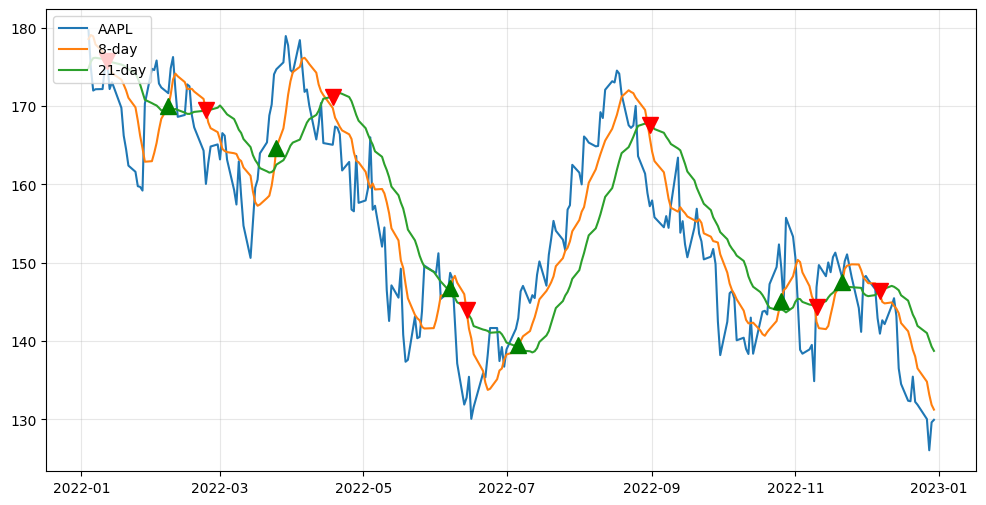

In [ ]:
# show the last year
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(aapl.iloc[-252:]['Close'], label = 'AAPL') # actual value
plt.plot(aapl.iloc[-252:]['8-day'], label = '8-day') # 8-day average
plt.plot(aapl.iloc[-252:]['21-day'], label = '21-day') # 21-day average
plt.plot(aapl[-252:].loc[aapl.signal == 1].index, aapl[-252:]['8-day'][aapl.signal == 1], '^',
         color = 'g', markersize = 12)
plt.plot(aapl[-252:].loc[aapl.signal == -1].index, aapl[-252:]['21-day'][aapl.signal == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

#### Apple investment amounts on the first day of every month

In [ ]:
# Add Return value, aggregate value of each stock and aggregate value of portfolio
# Bringing in the porportion of each stock that consists of our portfolio and our total investment

aapl_allocation = 0.5168 # allocation of AAPL

investment = 100000 # total investment

# create the daily money amount volatility columns of each stock
aapl['returnVal_AAPL'] = aapl_allocation* investment * aapl['system_return']

# create the aggregate value columns of each stock
aapl['aggVal_AAPL'] = aapl['returnVal_AAPL'] + (aapl_allocation * investment)


In [ ]:
!pip install pandas==1.5.3

# reset index and name it date

data.reset_index()
df = aapl.rename(columns={'index': 'date'})


# To run resample on local (Sometimes Pandas in colab is throwing errors , due to problems in pandas installation)
#df.to_pickle('df.zip') # zipping dataframe to resample on local (jupyter notebook)

# subset the first day of each month
aapl = df.resample('MS').first()

#new_data = pd.read_pickle('new_data.zip') # unzipping on colab to get back resampled dataframe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#aapl.index

#Aggregate Value on the first day of each month

# create a table showing the aggregate value of the whole porfolio
aapl_display = aapl.drop(columns=aapl.columns.difference(['aggVal_AAPL']))
aapl_display
# for buy and hold case, amount of money invested on the first day of each month equals to aggregate value on the first day

,aggVal_AAPL
2018-01-01,51680.0
2018-02-01,NaN
2018-03-01,NaN
2018-04-01,NaN
2018-05-01,NaN
2018-06-01,NaN
2018-07-01,NaN
2018-08-01,NaN
2018-09-01,NaN
2018-10-01,NaN


### System return for portfolio

In [ ]:
nike_system_return + ups_system_return + apple_system_return

-4988.831779815095

## 3.3 - Momentum trading strategy for the entire MPT portfolio

In [ ]:
# Assign the ticker list
tickers_list_group3 = ['NKE','UPS','AAPL']
portfolio_prices = {ticker : si.get_data(ticker,start_date = '12/2/2021',end_date='1/1/2023',interval='1d') for ticker in tickers_list}
portfolio_data = pd.DataFrame(portfolio_prices['NKE']['adjclose']).rename(columns = {"adjclose":"NKE"})
# combine all the tickers (all the rest of the samples)
for i in tickers_list_group3[0:]:
  portfolio_data[i] = pd.DataFrame(portfolio_prices[i]['adjclose'])
portfolio_data

,NKE,UPS,AAPL
2021-12-02,167.413818,191.806976,162.566849
2021-12-03,167.951492,192.603378,160.660843
2021-12-06,166.639374,193.879517,164.115479
2021-12-07,168.987350,197.074692,169.932785
2021-12-08,167.961365,196.431839,173.804367
...,...,...,...
2022-12-23,115.919472,175.464554,131.658981
2022-12-27,117.225746,175.385254,129.831772
2022-12-28,114.653084,172.094238,125.847855
2022-12-29,117.016342,174.215561,129.412415


In [ ]:
# data leakage because it includes the 8th day
for x in ['NKE','UPS','AAPL']:
  portfolio_data[f'{x}_8-day'] = portfolio_data[f'{x}'].rolling(8).mean()
  portfolio_data[f'{x}_21-day'] = portfolio_data[f'{x}'].rolling(21).mean()

portfolio_data.head(10)

,NKE,UPS,AAPL,NKE_8-day,NKE_21-day,UPS_8-day,UPS_21-day,AAPL_8-day,AAPL_21-day
2021-12-02,167.413818,191.806976,162.566849,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-03,167.951492,192.603378,160.660843,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-06,166.639374,193.879517,164.115479,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-07,168.987350,197.074692,169.932785,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-08,167.961365,196.431839,173.804367,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-09,165.840256,198.178131,173.288147,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-10,166.787338,200.644104,178.142532,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-13,164.597183,197.957443,174.459564,167.022272,NaN,196.072010,NaN,169.621321,NaN
2021-12-14,163.176529,195.491501,173.059830,166.492611,NaN,196.532576,NaN,170.932943,NaN
2021-12-15,161.696716,197.439331,177.993622,165.710764,NaN,197.137070,NaN,173.099541,NaN


In [ ]:
# rolled back (no data leakage)
# since this cell is run after, this overwrites the previous data leakage

for x in ['NKE','UPS','AAPL']:
  portfolio_data[f'{x}_8-day'] = portfolio_data[f'{x}'].rolling(8).mean().shift()
  portfolio_data[f'{x}_21-day'] = portfolio_data[f'{x}'].rolling(21).mean().shift()

portfolio_data.head(10)

,NKE,UPS,AAPL,NKE_8-day,NKE_21-day,UPS_8-day,UPS_21-day,AAPL_8-day,AAPL_21-day
2021-12-02,167.413818,191.806976,162.566849,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-03,167.951492,192.603378,160.660843,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-06,166.639374,193.879517,164.115479,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-07,168.987350,197.074692,169.932785,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-08,167.961365,196.431839,173.804367,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-09,165.840256,198.178131,173.288147,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-10,166.787338,200.644104,178.142532,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-13,164.597183,197.957443,174.459564,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-14,163.176529,195.491501,173.059830,167.022272,NaN,196.072010,NaN,169.621321,NaN
2021-12-15,161.696716,197.439331,177.993622,166.492611,NaN,196.532576,NaN,170.932943,NaN


In [ ]:
# rolled back (no data leakage)
# for loop with f-string embedding expressions inside string literals
for x in ['NKE','UPS','AAPL']:
  portfolio_data[f'{x}_8-day'] = portfolio_data[f'{x}'].rolling(8).mean().shift() # data will be shift after by one
  portfolio_data[f'{x}_21-day'] = portfolio_data[f'{x}'].rolling(21).mean().shift()

# drop nulls
portfolio_data.dropna(inplace=True)
# check work
portfolio_data

,NKE,UPS,AAPL,NKE_8-day,NKE_21-day,UPS_8-day,UPS_21-day,AAPL_8-day,AAPL_21-day
2022-01-03,162.456375,204.856369,180.683868,164.592262,164.399177,203.940031,199.287527,176.167023,172.703398
2022-01-04,164.153229,208.492920,178.390701,164.350555,164.163108,204.707642,199.908927,177.286308,173.566113
2022-01-05,160.068893,205.873444,173.645538,164.467707,163.982239,205.769102,200.665572,177.790112,174.410392
2022-01-06,158.875153,207.869247,170.746811,164.045954,163.669359,206.053360,201.236711,177.621353,174.864205
2022-01-07,154.859879,209.327698,170.915588,163.239445,163.187826,206.236868,201.750738,176.587688,174.902968
...,...,...,...,...,...,...,...,...,...
2022-12-23,115.919472,175.464554,131.658981,109.376875,108.789203,177.427271,179.472589,136.296896,141.714103
2022-12-27,117.225746,175.385254,129.831772,109.800667,109.260543,176.579735,179.197394,134.598240,140.800735
2022-12-28,114.653084,172.094238,125.847855,110.562245,109.826750,175.665289,178.933527,132.953251,139.941095
2022-12-29,117.016342,174.215561,129.412415,111.368696,110.317787,174.723581,178.636146,131.647745,139.076701


In [ ]:
# Creat the logclose price and calculate return for each stock
# for loop with f-strings to create logclose columns
for x in ['NKE','UPS','AAPL']:
  portfolio_data[f'logClose_{x}'] = np.log(portfolio_data[f'{x}'])

# for loop with f-strings to create return columns
for x in ['NKE','UPS','AAPL']:
  portfolio_data[f'return_{x}'] = portfolio_data[f'logClose_{x}'].diff()

# check work
portfolio_data.head()


,NKE,UPS,AAPL,NKE_8-day,NKE_21-day,UPS_8-day,UPS_21-day,AAPL_8-day,AAPL_21-day,logClose_NKE,logClose_UPS,logClose_AAPL,return_NKE,return_UPS,return_AAPL
2022-01-03,162.456375,204.856369,180.683868,164.592262,164.399177,203.940031,199.287527,176.167023,172.703398,5.090410,5.322309,5.196749,NaN,NaN,NaN
2022-01-04,164.153229,208.492920,178.390701,164.350555,164.163108,204.707642,199.908927,177.286308,173.566113,5.100800,5.339905,5.183976,0.010391,0.017596,-0.012773
2022-01-05,160.068893,205.873444,173.645538,164.467707,163.982239,205.769102,200.665572,177.790112,174.410392,5.075604,5.327262,5.157016,-0.025196,-0.012643,-0.026960
2022-01-06,158.875153,207.869247,170.746811,164.045954,163.669359,206.053360,201.236711,177.621353,174.864205,5.068119,5.336909,5.140182,-0.007486,0.009648,-0.016834
2022-01-07,154.859879,209.327698,170.915588,163.239445,163.187826,206.236868,201.750738,176.587688,174.902968,5.042521,5.343901,5.141170,-0.025598,0.006992,0.000988


#### Add "invested" column

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
for x in ['NKE','UPS','AAPL']:
  portfolio_data[f'invested_{x}'] = np.where(portfolio_data[f'{x}_8-day'] > portfolio_data[f'{x}_21-day'], 1, 0)


portfolio_data.head()

,NKE,UPS,AAPL,NKE_8-day,NKE_21-day,UPS_8-day,UPS_21-day,AAPL_8-day,AAPL_21-day,logClose_NKE,logClose_UPS,logClose_AAPL,return_NKE,return_UPS,return_AAPL,invested_NKE,invested_UPS,invested_AAPL
2022-01-03,162.456375,204.856369,180.683868,164.592262,164.399177,203.940031,199.287527,176.167023,172.703398,5.090410,5.322309,5.196749,NaN,NaN,NaN,1,1,1
2022-01-04,164.153229,208.492920,178.390701,164.350555,164.163108,204.707642,199.908927,177.286308,173.566113,5.100800,5.339905,5.183976,0.010391,0.017596,-0.012773,1,1,1
2022-01-05,160.068893,205.873444,173.645538,164.467707,163.982239,205.769102,200.665572,177.790112,174.410392,5.075604,5.327262,5.157016,-0.025196,-0.012643,-0.026960,1,1,1
2022-01-06,158.875153,207.869247,170.746811,164.045954,163.669359,206.053360,201.236711,177.621353,174.864205,5.068119,5.336909,5.140182,-0.007486,0.009648,-0.016834,1,1,1
2022-01-07,154.859879,209.327698,170.915588,163.239445,163.187826,206.236868,201.750738,176.587688,174.902968,5.042521,5.343901,5.141170,-0.025598,0.006992,0.000988,1,1,1


In [ ]:
for x in ['NKE','UPS','AAPL']:
  print(portfolio_data[f'invested_{x}'].value_counts())

0    152
1     99
Name: invested_NKE, dtype: int64
0    127
1    124
Name: invested_UPS, dtype: int64
0    150
1    101
Name: invested_AAPL, dtype: int64


#### Entering and leaving the market using the momentum trading strategy and system returns

Now we make a column called 'signal' which tells us when to enter and leave the market based on the momentum trading strategy. We want to buy/sell at the transition points, i.e., when the plots are intersecting and the trend is changing.

A value of +1 indicates that we should buy, and a value of -1 indicates that we should sell. This happens when the trend flips.

In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
for x in ['NKE','UPS','AAPL']:
    portfolio_data[f'signal_{x}'] = portfolio_data[f'invested_{x}'].diff()
    # since signal calculates the difference from previous day, so the first record is null, we change to 0 for data quality
    for date in ["2021-12-12", "2023-01-01"]:
        if date == "2021-12-12":
            portfolio_data.loc[date, f'signal_{x}'] = 0
        # the first buy-in point is currently 2021-12-04, even though the first record is 2021-12-02
        elif date == "2021-12-04":
            portfolio_data.loc[date, f'signal_{x}'] = 1

for x in ['NKE', 'UPS', 'AAPL']:
  portfolio_data[f'system_return_{x}'] = portfolio_data[f'invested_{x}'] * portfolio_data[f'return_{x}']



for x in ['NKE','UPS','AAPL']:
  print(portfolio_data[f'signal_{x}'].value_counts())


 0.0    241
-1.0      5
 1.0      5
Name: signal_NKE, dtype: int64
 0.0    238
-1.0      7
 1.0      6
Name: signal_UPS, dtype: int64
 0.0    238
-1.0      7
 1.0      6
Name: signal_AAPL, dtype: int64


In [ ]:
portfolio_data.head()

,NKE,UPS,AAPL,NKE_8-day,NKE_21-day,UPS_8-day,UPS_21-day,AAPL_8-day,AAPL_21-day,logClose_NKE,...,return_AAPL,invested_NKE,invested_UPS,invested_AAPL,signal_NKE,signal_UPS,signal_AAPL,system_return_NKE,system_return_UPS,system_return_AAPL
2022-01-03,162.456375,204.856369,180.683868,164.592262,164.399177,203.940031,199.287527,176.167023,172.703398,5.090410,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,164.153229,208.492920,178.390701,164.350555,164.163108,204.707642,199.908927,177.286308,173.566113,5.100800,...,-0.012773,1.0,1.0,1.0,0.0,0.0,0.0,0.010391,0.017596,-0.012773
2022-01-05,160.068893,205.873444,173.645538,164.467707,163.982239,205.769102,200.665572,177.790112,174.410392,5.075604,...,-0.026960,1.0,1.0,1.0,0.0,0.0,0.0,-0.025196,-0.012643,-0.026960
2022-01-06,158.875153,207.869247,170.746811,164.045954,163.669359,206.053360,201.236711,177.621353,174.864205,5.068119,...,-0.016834,1.0,1.0,1.0,0.0,0.0,0.0,-0.007486,0.009648,-0.016834
2022-01-07,154.859879,209.327698,170.915588,163.239445,163.187826,206.236868,201.750738,176.587688,174.902968,5.042521,...,0.000988,1.0,1.0,1.0,0.0,0.0,0.0,-0.025598,0.006992,0.000988


In [ ]:
portfolio_data_new = portfolio_data.copy()

#### Plot trades on time series for 2022

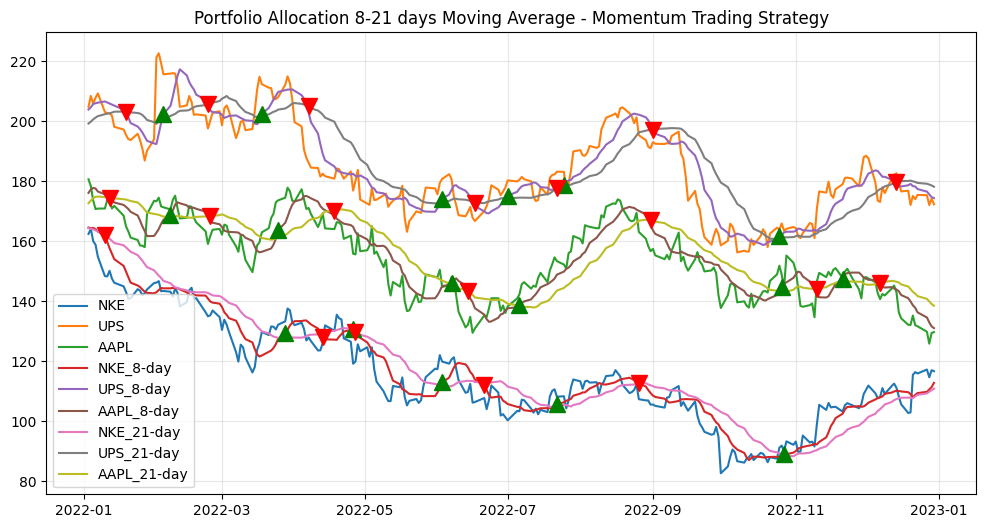

In [ ]:
# imagine where you would put markers on the plot
# for buy vs. sell...
# Visualize the buy and sell point

# the -252: shows the last 252 days
plt.rcParams['figure.figsize'] = 12,6
plt.title('Portfolio Allocation 8-21 days Moving Average - Momentum Trading Strategy')
plt.grid(True, alpha = .3)

# adjusted close price of three stocks
plt.plot(portfolio_data.iloc[-252:]['NKE'], label = 'NKE') # actual value
plt.plot(portfolio_data.iloc[-252:]['UPS'], label = 'UPS') # actual value
plt.plot(portfolio_data.iloc[-252:]['AAPL'], label = 'AAPL') # actual value

# three 8-day moving average lines
plt.plot(portfolio_data.iloc[-252:]['NKE_8-day'], label = 'NKE_8-day') # 8-day average
plt.plot(portfolio_data.iloc[-252:]['UPS_8-day'], label = 'UPS_8-day') # 8-day average
plt.plot(portfolio_data.iloc[-252:]['AAPL_8-day'], label = 'AAPL_8-day') # 8-day average

# three 21-day moving average lines
plt.plot(portfolio_data.iloc[-252:]['NKE_21-day'], label = 'NKE_21-day') # 21-day average
plt.plot(portfolio_data.iloc[-252:]['UPS_21-day'], label = 'UPS_21-day') # 21-day average
plt.plot(portfolio_data.iloc[-252:]['AAPL_21-day'], label = 'AAPL_21-day') # 21-day average

# signals of buying
plt.plot(portfolio_data[-252:].loc[portfolio_data.signal_NKE == 1].index, portfolio_data[-252:]['NKE_8-day'][portfolio_data.signal_NKE == 1], '^',
         color = 'g', markersize = 12)
plt.plot(portfolio_data[-252:].loc[portfolio_data.signal_UPS == 1].index, portfolio_data[-252:]['UPS_8-day'][portfolio_data.signal_UPS == 1], '^',
         color = 'g', markersize = 12)
plt.plot(portfolio_data[-252:].loc[portfolio_data.signal_AAPL == 1].index, portfolio_data[-252:]['AAPL_8-day'][portfolio_data.signal_AAPL == 1], '^',
         color = 'g', markersize = 12)

# signals of selling
plt.plot(portfolio_data[-252:].loc[portfolio_data.signal_NKE == -1].index, portfolio_data[-252:]['NKE_8-day'][portfolio_data.signal_NKE == -1], 'v',
         color = 'r', markersize = 12)
plt.plot(portfolio_data[-252:].loc[portfolio_data.signal_UPS == -1].index, portfolio_data[-252:]['UPS_21-day'][portfolio_data.signal_UPS == -1], 'v',
         color = 'r', markersize = 12)
plt.plot(portfolio_data[-252:].loc[portfolio_data.signal_AAPL == -1].index, portfolio_data[-252:]['AAPL_21-day'][portfolio_data.signal_AAPL == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=0);

#### Investment amounts on first day of the month

In [ ]:
# Add Return value, aggregate value of each stock and aggregate value of portfolio
# Bringing in the porportion of each stock that consists of our portfolio and our total investment

Nike_allocation = 0.3034 # allocation of NKE
UPS_allocation = 0.1798 # allocation of AAPL
Apple_allocation = 0.5168 # allocation of UPS

investment = 100000 # total investment

# create the daily money amount volatility columns of each stock
portfolio_data['returnVal_NKE'] = Nike_allocation* investment * portfolio_data['return_NKE']
portfolio_data['returnVal_AAPL'] = Apple_allocation * investment * portfolio_data['return_AAPL']
portfolio_data['returnVal_UPS'] = UPS_allocation* investment * portfolio_data['return_UPS']


# create the aggregate value columns of each stock
portfolio_data['aggVal_NKE'] = portfolio_data['returnVal_NKE'] + (Nike_allocation * investment)
portfolio_data['aggVal_AAPL'] = portfolio_data['returnVal_AAPL'] + (Apple_allocation * investment)
portfolio_data['aggVal_UPS'] = portfolio_data['returnVal_UPS'] + (UPS_allocation * investment)

# create the aggregate value columns of portfolio
portfolio_data['aggVal_portfolio'] = portfolio_data['aggVal_NKE'] + portfolio_data['aggVal_AAPL'] + portfolio_data['aggVal_UPS']

In [ ]:
!pip install pandas==1.5.3

# reset index and name it date

data.reset_index()
df = portfolio_data.rename(columns={'index': 'date'})

# subset the first day of each month
# To run resample on local (Sometimes Pandas in colab is throwing errors , due to problems in pandas installation)
#df.to_pickle('df.zip') # zipping dataframe to resample on local (jupyter notebook)


portfolio_data = df.resample('MS').first()
#new_data = pd.read_pickle('new_data.zip') # unzipping on colab to get back resampled dataframe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Aggregate Value on the first day of each month

# create a table showing the aggregate value of the whole porfolio
portfolio_data_display = portfolio_data.drop(columns=portfolio_data.columns.difference(['aggVal_NKE','aggVal_UPS','aggVal_AAPL','aggVal_portfolio']))
portfolio_data_display
# for buy and hold case, amount of money invested on the first day of each month equals to aggregate value on the first day

,aggVal_NKE,aggVal_AAPL,aggVal_UPS,aggVal_portfolio
2021-12-01,NaN,NaN,NaN,NaN
2022-01-01,30655.257126,51019.900413,18296.375879,99971.533418
2022-02-01,30370.715938,51629.713214,20349.188743,102349.617895
2022-03-01,29362.335197,51075.546121,17561.601661,97999.482979
2022-04-01,30104.596718,51591.128823,17312.131466,99007.857006
2022-05-01,30673.913258,51781.523649,17839.590884,100295.027791
2022-06-01,30296.571107,51634.840934,17779.601404,99711.013446
2022-07-01,30035.671865,52508.691890,18219.719108,100764.082862
2022-08-01,30175.871304,51361.011724,18021.468680,99558.351708
2022-09-01,30351.400605,51922.678186,18173.077190,100447.155981


## Comparing the strategies of Buy/Hold & Momentum Trading

The plot below compares the performance of the Buy and Hold strategy with the Momentum Trading strategy.

#### For Nike

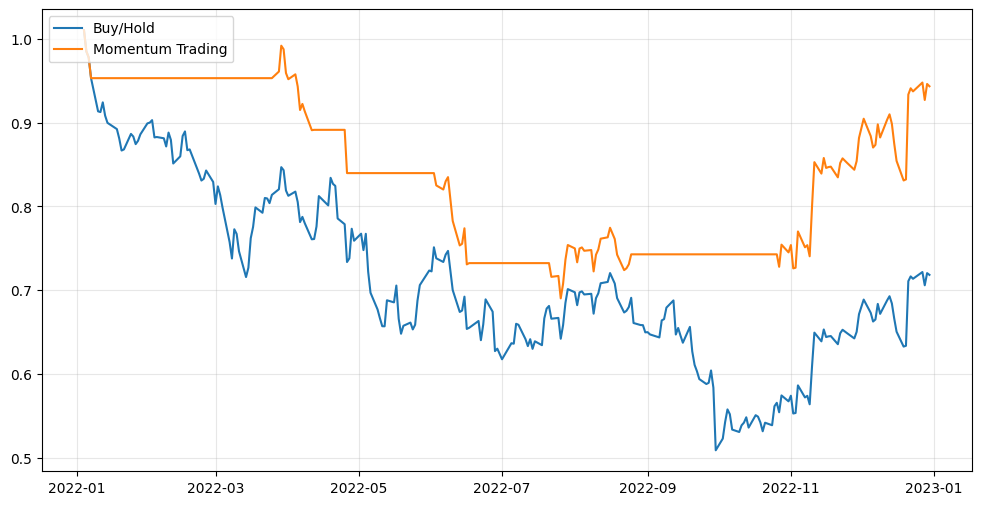

In [ ]:
## For NKE

plt.plot(np.exp(portfolio_data_new['return_NKE']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(portfolio_data_new['system_return_NKE']).cumprod(), label='Momentum Trading')

plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

#### For UPS

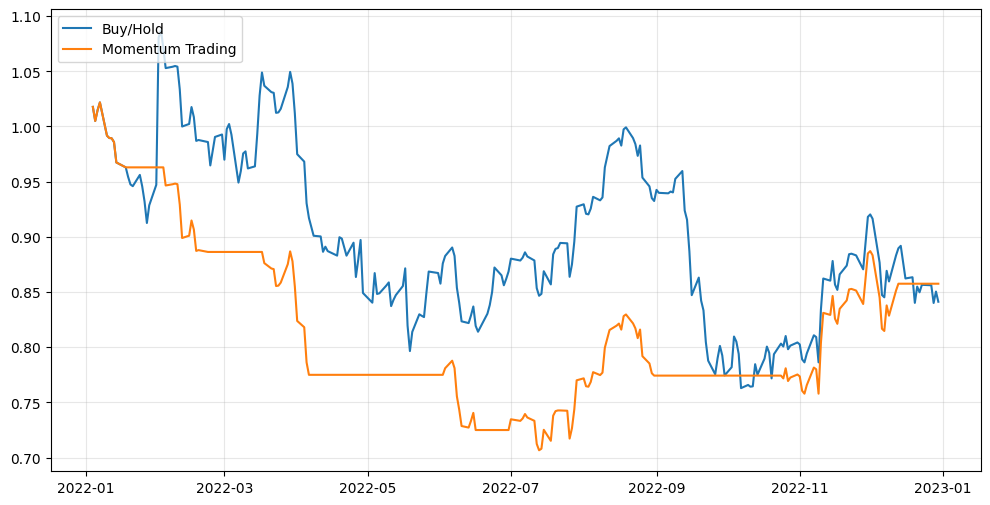

In [ ]:
## For UPS

plt.plot(np.exp(portfolio_data_new['return_UPS']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(portfolio_data_new['system_return_UPS']).cumprod(), label='Momentum Trading')

plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

#### For Apple

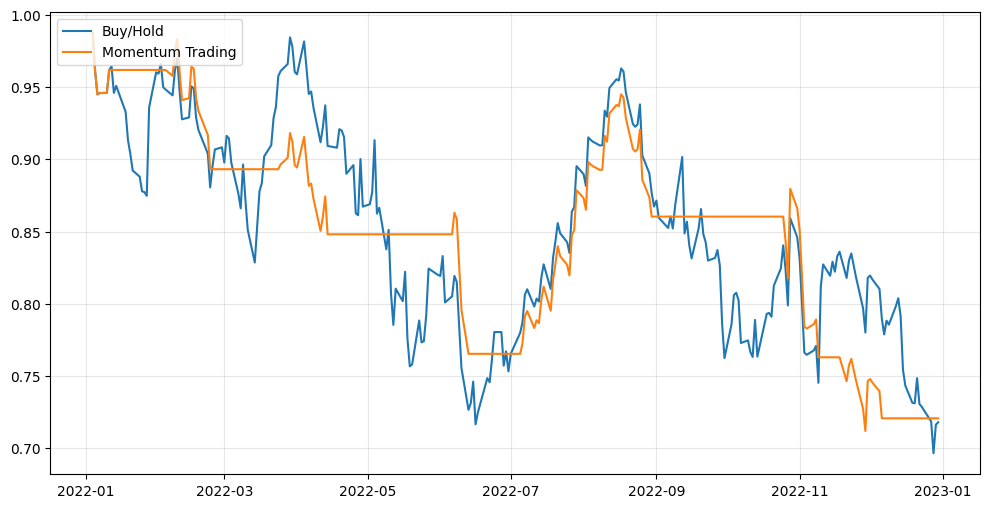

In [ ]:
## For Apple

plt.plot(np.exp(portfolio_data_new['return_AAPL']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(portfolio_data_new['system_return_AAPL']).cumprod(), label='Momentum Trading')

plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

## 3.4 - Buy-and-Hold strategy for the S&P 500 index

In [ ]:
# ticker = GSPC, a ticker symbol for the S&P 500
ticker4= '^GSPC'
GSPC_prices = si.get_data(ticker4,start_date = '12/29/2021',end_date='12/31/2022',interval='1d')

# We only need the adjusted close price
GSPC_prices.drop(columns=['open', 'high','low','close','volume','ticker'], inplace = True)

# change the sequence or columns
GSPC_prices = GSPC_prices[['adjclose']]

# rename the columns
GSPC_prices.columns = ['Adjclose']

# check our work
GSPC_prices.head()

GSPC_prices['logClose'] = np.log(GSPC_prices['Adjclose']) # price will always be positive, so this operation is well-defined
GSPC_prices['return'] = GSPC_prices['logClose'].diff() # the difference will be positive or negative

GSPC_prices.loc["2021-12-29",'return'] = 0.0
GSPC_prices.head()

,Adjclose,logClose,return
2021-12-29,4793.060059,8.474924,0.000000
2021-12-30,4778.729980,8.471930,-0.002994
2021-12-31,4766.180176,8.469300,-0.002630
2022-01-03,4796.560059,8.475654,0.006354
2022-01-04,4793.540039,8.475024,-0.000630


In [ ]:
np.exp(np.sum(GSPC_prices['return'])) -1

-0.1989459858496997

## 3.5 - Plot Comparing the Investment Strategies

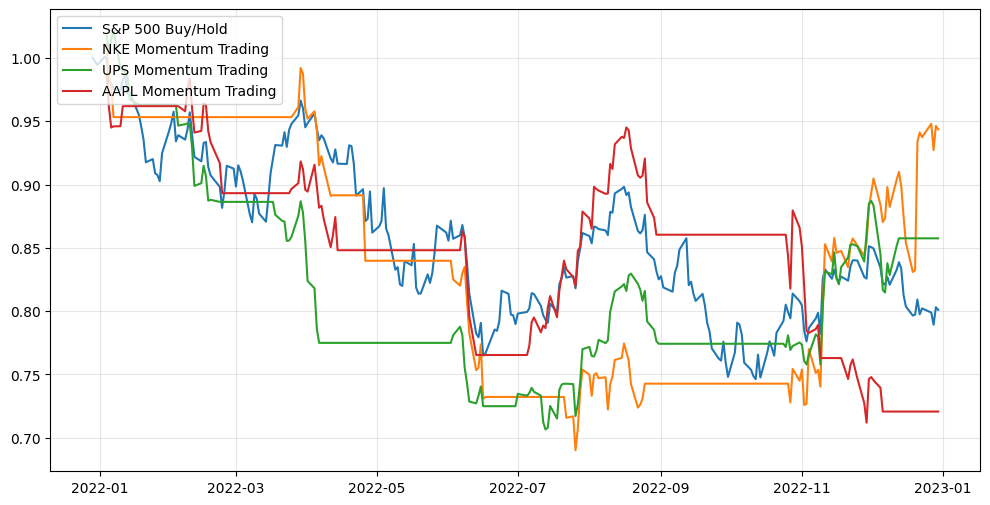

In [ ]:
plt.plot(np.exp(GSPC_prices['return']).cumprod(), label='S&P 500 Buy/Hold')  #S&P 500 Buy/Hold
#plt.plot(np.exp(new_data['return_NKE']).cumprod(), label='MPT NKE') # MPT NKE
#plt.plot(np.exp(new_data['return_UPS']).cumprod(), label='MPT UPS') # MPT UPS
#plt.plot(np.exp(new_data['return_AAPL']).cumprod(), label='MPT AAPL') # MPT AAPL
plt.plot(np.exp(portfolio_data_new['system_return_NKE']).cumprod(), label='NKE Momentum Trading') # Momentum trading of NKE in porfolio
plt.plot(np.exp(portfolio_data_new['system_return_UPS']).cumprod(), label='UPS Momentum Trading')  # Momentum trading of UPS in porfolio
plt.plot(np.exp(portfolio_data_new['system_return_AAPL']).cumprod(), label='AAPL Momentum Trading') # Momentum trading of AAPL in porfolio
plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

## 3.6 - Discussion and Comparison of the Investment Strategies

Modern Portfolio Theory (MPT) focuses on diversification and the optimization of portfolio allocation to maximize returns and minimize risk. We decided to go ahead with our portfolio at the risk of 0.00023 with 30.34% shares of Nike(NKE),17.98% shares of UPS and 51.68% shares of Apple (AAPL).

Since we want to benefit from our investments over time, while at the same minimizing the risks associated, we look into the buy and hold strategy.
The idea behind this strategy is to focus on the long-term potential of an investment, rather than short-term volatility, and allow compounding returns to work in favor of the investor.

We used the momentum strategy to identify short-term momentum and potential buy or sell signals - Moving averages are commonly used in momentum trading to help identify changes in the direction and strength of a stock's price trend. We used the 8-day and 21-day moving averages

For example, if the 8-day moving average crosses above the 21-day moving average('BULL'), it is a good time to buy. Conversely, if the 8-day moving average crosses below the 21-day moving average('BEAR'), it is a good time to sell.

The buy-and-hold strategy for the S&P 500 index (^GSPC) is characterized by the purchase and retention of a collection of stocks from the S&P 500 index over an extended duration. Despite short-term fluctuations and market downturns, the stock market typically shows a tendency to rise over the long run. If investors purchase a diverse range of stocks and keep them for an extended period, they may reap the benefits of the stock market's long-term growth potential.

When we implement the momentum trading strategy with our NKE, UPS and AAPL shares, over the past year of 2022 - we get negative returns for all three. But when we consider a smaller window of 3 months, Nike gives positive return while UPS and Apple give negative returns.

# 4 - Conclusion

## 4.1 - Thoughts and Insights

This was a very interesting project that helped us take a deep dive into the world of stocks and portfolio allocation. We learnt quite a bit about different methods and strategies like the momemtum trading strategy that enables us to predict the stock prices direction to invest to make profits and minimise risks/losses.

These are some of our learnings from our project:
1. We need to understand which stocks allocation works the best for us. It is important to invest in a variety of stocks. Diversification is important!
2. We also have to select an appropriate risk level for the allocation, while at the same time ensuring that the portfolio is diverse enough.
3. The short-term fluctuations of the market can be erratic and might not exert a substantial influence on the overall performance of our investment portfolio in the long run.
4. Before making an investment decision, we need to compare strategies according to our risk appetite. For example, while momentum trading can be highly profitable for active and aggressive traders, it might be rather impractical for most individual investors. Similarly , "buy and hold" strategy is not a one-size-fits-all approach and may not be appropriate for all investors.
5.We also learned how much the stock allocation can change with the risk level. When we tried using the point in the efficient frontier where the rewards stabilize and the law of diminishing returns kicks in, we didn't expect one single stock to have 99% of the allocation (even though the risk was nowhere near its highest level).

## 4.2 - Individual Contributions

Team 5 - Chaitanya, Koushik and Shagun.

Everybody contributed equally. Thank you for letting us select our own team!